# Projet 2 : Analysez des données de systèmes éducatifs

![image_systeme_educatif](image_education.jpeg)

Pour la pré-analyse, la mission est de :
* Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
* Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
* Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
* Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Les conclusions doivent être concernant :
* Quels sont les pays avec un fort potentiel de clients pour nos services ?
* Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
* Dans quels pays l'entreprise doit-elle opérer en priorité ?

## Environnement & Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt #display graph
%matplotlib inline

import seaborn as sns #graph display

In [2]:
#Modification des affichages de colonnes et lignes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

## Chargement des dataset

Les données sont extraites de la Banque mondiale et sont disponible aux adresses suivantes :
* https://datacatalog.worldbank.org/dataset/education-statistics

* ou en téléchargement direct à ce [lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Donn%C3%A9es+%C3%A9ducatives/Projet+Python_Dataset_Edstats_csv.zip).

En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... 
Des informations plus détaillés sur les indicateur peuvent être trouver sur le lien [Worldbank](http://datatopics.worldbank.org/education/).

In [3]:
Country = pd.read_csv('EdStatsCountry.csv')
Country_Series = pd.read_csv('EdStatsCountry-Series.csv')
FootNote = pd.read_csv('EdStatsFootNote.csv')
Series = pd.read_csv('EdStatsSeries.csv')
Data = pd.read_csv('EdStatsData.csv')

# Analyse Exploratoire des données

## Information contenues dans le jeu de données

In [4]:
shape_Country=Country.shape
shape_Country_Series=Country_Series.shape
shape_FootNote=FootNote.shape
shape_Series=Series.shape
shape_Data=Data.shape

print ('_'*60)
print("Le fichier Country comporte %d lignes et %d colonnes" %(shape_Country[0], shape_Country[1]))
print("Le fichier Country_Series comporte %d lignes et %d colonnes" %(shape_Country_Series[0], shape_Country_Series[1]))
print("Le fichier FootNote comporte %d lignes et %d colonnes" %(shape_FootNote[0], shape_FootNote[1]))
print("Le fichier Series comporte %d lignes et %d colonnes" %(shape_Series[0], shape_Series[1]))
print("Le fichier Data comporte %d lignes et %d colonnes" %(shape_Data[0], shape_Data[1]))
print ('_'*60)

____________________________________________________________
Le fichier Country comporte 241 lignes et 32 colonnes
Le fichier Country_Series comporte 613 lignes et 4 colonnes
Le fichier FootNote comporte 643638 lignes et 5 colonnes
Le fichier Series comporte 3665 lignes et 21 colonnes
Le fichier Data comporte 886930 lignes et 70 colonnes
____________________________________________________________


### Analyse de Country.csv

In [5]:
Country.head(3) #print 3 first row of data

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


Le fichier Country regroupe dans un tableau de 241 lignes et 32 colonnes, la liste de tous les pays figurant dans le jeu de données avec certaines de leurs informations. Les informations les plus représentatives sont :
* Le code du pays en quelques lettres majuscules
* le nom court et long du pays
* la devise
* la region du monde dont il fait partie 
* le groupe de revenu dans lequel il est classé

La première analyse de ce fichier soulève 2 interrogations. Pourquoi il y a 241 lignes alors que l'Organisation des Nations Unies en reconnait 197 à ce jour ? Existe t'il des informations manquantes dans les informations représentatives précedement citées comme dans d'autres colonnes ? 

In [6]:
missing_value_by_column_Country=(Country.isnull().sum())
print('_'*60)
print(missing_value_by_column_Country)
print('_'*60)

____________________________________________________________
Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion fact

Dans ce fichier 26 lignes ne possédent pas d'informations quand à la devise et 27 lignes en ce qui concerne la région du monde et le groupe de revenu.

In [7]:
Region=Country[Country['Region'].isnull()]
Country[Country['Region'].isnull()]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,GIB,Gibraltar,Gibraltar,Gibraltar,GI,Gibraltar pound,NaN,NaN,NaN,GI,NaN,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Country[Country['Region'].isnull()].shape

(27, 32)

Les 27 données manquantes dans notre précedente recherche correspondes au fait que sont, en plus des pays, listées les differentes zones du monde ainsi que le World et les groupes de revenues. Par conséquent cela reviens à enlever 27 groupes de notre liste. Le fichier fait donc pour le moment 214 lignes au lieux de 197 attendues (différences de 17). Peut-être des doublons? 

In [9]:
Region_and_Income_group=Country[Country['Region'].isnull()]['Short Name'].unique()
print(Region_and_Income_group.shape)
print('-'*60)
print(Region_and_Income_group)

(27,)
------------------------------------------------------------
['Arab World' 'East Asia & Pacific (developing only)'
 'East Asia & Pacific (all income levels)'
 'Europe & Central Asia (developing only)'
 'Europe & Central Asia (all income levels)' 'Euro area' 'European Union'
 'Gibraltar' 'High income' 'Heavily indebted poor countries (HIPC)'
 'Latin America & Caribbean (developing only)'
 'Latin America & Caribbean (all income levels)'
 'Least developed countries: UN classification' 'Low income'
 'Lower middle income' 'Low & middle income'
 'Middle East & North Africa (all income levels)' 'Middle income'
 'Middle East & North Africa (developing only)' 'North America' 'Nauru'
 'OECD members' 'South Asia' 'Sub-Saharan Africa (developing only)'
 'Sub-Saharan Africa (all income levels)' 'Upper middle income' 'World']


In [10]:
list_unique_countries = Country[~Country['Short Name'].isin(Region_and_Income_group)]['Short Name'].nunique()
print("Il y a dans le fichier Country.csv %d nom de pays différents" %(list_unique_countries))
print("_"*60)
print(Country[~Country['Short Name'].isin(Region_and_Income_group)]['Short Name'].unique())

Il y a dans le fichier Country.csv 214 nom de pays différents
____________________________________________________________
['Aruba' 'Afghanistan' 'Angola' 'Albania' 'Andorra' 'United Arab Emirates'
 'Argentina' 'Armenia' 'American Samoa' 'Antigua and Barbuda' 'Australia'
 'Austria' 'Azerbaijan' 'Burundi' 'Belgium' 'Benin' 'Burkina Faso'
 'Bangladesh' 'Bulgaria' 'Bahrain' 'The Bahamas' 'Bosnia and Herzegovina'
 'Belarus' 'Belize' 'Bermuda' 'Bolivia' 'Brazil' 'Barbados' 'Brunei'
 'Bhutan' 'Botswana' 'Central African Republic' 'Canada' 'Switzerland'
 'Channel Islands' 'Chile' 'China' "Côte d'Ivoire" 'Cameroon'
 'Dem. Rep. Congo' 'Congo' 'Colombia' 'Comoros' 'Cabo Verde' 'Costa Rica'
 'Cuba' 'Curaçao' 'Cayman Islands' 'Cyprus' 'Czech Republic' 'Germany'
 'Djibouti' 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Egypt' 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Faeroe Islands' 'Micronesia' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana'
 'Guinea' 'The Gam

La différence observée entre le nombre de pays recensé par l'ONU et notre fichier viens du fais que certains pays notamment les iles sont fractionnées. Par exemple la polynesie francaise est compté comme un pays indépendant.

In [11]:
list_region = Country[~Country['Short Name'].isin(Region_and_Income_group)]['Region'].unique()
print("Il y a dans le fichier Country.csv %d regions du monde différentes" %(Country[~Country['Short Name'].isin(Region_and_Income_group)]['Region'].nunique()))
print("_"*60)
print(list_region)

Il y a dans le fichier Country.csv 7 regions du monde différentes
____________________________________________________________
['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [12]:
list_Income_group = Country[~Country['Short Name'].isin(Region_and_Income_group)]['Income Group'].unique()
print("Il y a dans le fichier Country.csv %d groupes de revenu différents" %(Country[~Country['Short Name'].isin(Region_and_Income_group)]['Income Group'].nunique()))
print("_"*60)
print(list_Income_group)

Il y a dans le fichier Country.csv 5 groupes de revenu différents
____________________________________________________________
['High income: nonOECD' 'Low income' 'Upper middle income'
 'Lower middle income' 'High income: OECD']


In [13]:
list_Currency = Country[~Country['Short Name'].isin(Region_and_Income_group)]['Currency Unit'].unique()
print("Il y a dans le fichier Country.csv %d devises différentes" %(Country[~Country['Short Name'].isin(Region_and_Income_group)]['Currency Unit'].nunique()))
print("_"*60)
print(list_Currency)

Il y a dans le fichier Country.csv 151 devises différentes
____________________________________________________________
['Aruban florin' 'Afghan afghani' 'Angolan kwanza' 'Albanian lek' 'Euro'
 'U.A.E. dirham' 'Argentine peso' 'Armenian dram' 'U.S. dollar'
 'East Caribbean dollar' 'Australian dollar' 'New Azeri manat'
 'Burundi franc' 'CFA franc' 'Bangladeshi taka' 'Bulgarian lev'
 'Bahraini dinar' 'Bahamian dollar'
 'Bosnia and Herzegovina convertible mark' 'Belarusian rubel'
 'Belize dollar' 'Bermuda dollar' 'Bolivian Boliviano' 'Brazilian real'
 'Barbados dollar' 'Brunei dollar' 'Bhutanese ngultrum' 'Botswana pula'
 'Canadian dollar' 'Swiss franc' 'Pound sterling' 'Chilean peso'
 'Chinese yuan' 'Congolese franc' 'Colombian peso' 'Comorian franc'
 'Cabo Verde escudo' 'Costa Rican colon' 'Cuban peso'
 'Netherlands Antilles guilder' 'Cayman Islands dollar' 'Czech koruna'
 'Djibouti franc' 'Danish krone' 'Dominican peso' 'Algerian dinar'
 'Egyptian pound' 'Eritrean nakfa' 'Ethiopian bir

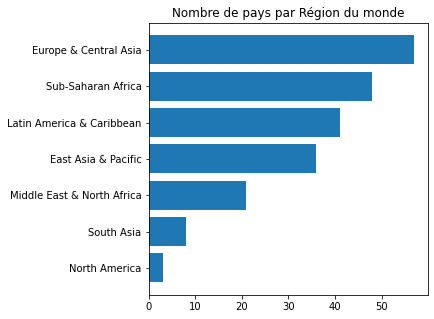

In [14]:
plt.figure(figsize=(5,5))
plt.barh(y = Country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width = Country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Région du monde')
plt.show()

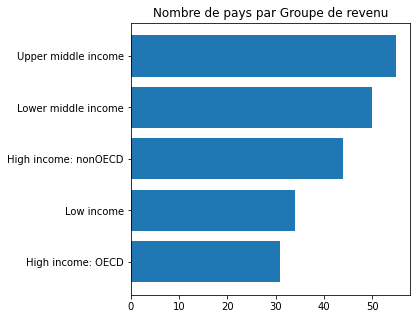

In [15]:
plt.figure(figsize=(5,5))
plt.barh(y = Country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Income Group'], width = Country.groupby('Income Group')[['Short Name']].count()['Short Name'].sort_values())
plt.title('Nombre de pays par Groupe de revenu')
plt.show()

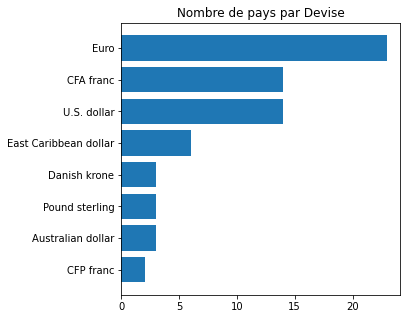

In [16]:
plt.figure(figsize=(5,5))
plt.barh(y = Country.groupby('Currency Unit')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Currency Unit'].tail(8), width = Country.groupby('Currency Unit')[['Short Name']].count()['Short Name'].sort_values().tail(8))
plt.title('Nombre de pays par Devise')
plt.show()

### Analyse de Country_Series.csv

In [17]:
Country_Series.head(5) #print 5 first row of data

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


Le fichier Country_Series.csv contient 613 lignes et 4 colonnes. Il regroupe pour chaque pays sous forme de code associé au fichier Country un indicateur (SeriesCode) ainsi qu'une description.

In [18]:
list_CountryCode_Country_Series=Country_Series['CountryCode'].nunique()
print('Le fichier Country_Series regroupe %d code de pays différents' %(list_CountryCode_Country_Series))

Le fichier Country_Series regroupe 211 code de pays différents


Comme il existe 211 code de pays dans Country_Series alors qu'il y en a 241 dans le fichier Country, nous allons chercher à savoir quelles sont les differences entre les deux.

In [19]:
list_unique_CountryCode_in_Country_not_Country_Series = Country[~Country['Country Code'].isin(Country_Series['CountryCode'])]['Country Code'].nunique()
print("Il y a dans le fichier Country.csv %d nom de pays qui ne figure pas dans Country_Series.csv" %(list_unique_CountryCode_in_Country_not_Country_Series))
print("_"*60)
print(Country[~Country['Country Code'].isin(Country_Series['CountryCode'])]['Country Code'].unique())
list_unique_CountryCode_in_Country_Series_not_Country = Country_Series[~Country_Series['CountryCode'].isin(Country['Country Code'])]['CountryCode'].nunique()
print("_"*60)
print("Il y a dans le fichier Country_Series.csv %d nom de pays qui ne figure pas dans Country.csv" %(list_unique_CountryCode_in_Country_Series_not_Country))

Il y a dans le fichier Country.csv 30 nom de pays qui ne figure pas dans Country_Series.csv
____________________________________________________________
['ARB' 'CUW' 'EAP' 'EAS' 'ECA' 'ECS' 'EMU' 'EUU' 'HIC' 'HPC' 'LAC' 'LCN'
 'LDC' 'LIC' 'LMC' 'LMY' 'MAF' 'MEA' 'MIC' 'MNA' 'NAC' 'NRU' 'OED' 'SAS'
 'SSA' 'SSD' 'SSF' 'SXM' 'UMC' 'WLD']
____________________________________________________________
Il y a dans le fichier Country_Series.csv 0 nom de pays qui ne figure pas dans Country.csv


Il existe une difference entre les deux fichiers Country et Country_Series par rapport au code de pays car il n'y à pas les regroupement de region dans Country_Series.

In [20]:
list_SeriesCode_Country_Series=Country_Series['SeriesCode'].nunique()
print('Le fichier Country_Series regroupe %d indicateurs différents' %(list_SeriesCode_Country_Series))
print("_"*60)
print(Country_Series['SeriesCode'].unique())

Le fichier Country_Series regroupe 21 indicateurs différents
____________________________________________________________
['SP.POP.TOTL' 'SP.POP.GROW' 'NY.GDP.PCAP.PP.CD' 'NY.GDP.MKTP.PP.KD'
 'NY.GNP.MKTP.PP.CD' 'NY.GDP.MKTP.PP.CD' 'NY.GDP.PCAP.PP.KD'
 'NY.GNP.PCAP.PP.CD' 'SP.POP.1564.TO.ZS' 'SP.POP.TOTL.MA.ZS'
 'SP.POP.TOTL.FE.ZS' 'SP.POP.0014.TO.ZS' 'NY.GNP.PCAP.CD' 'NY.GDP.PCAP.CD'
 'NY.GDP.PCAP.KD' 'SP.POP.1564.MA.IN' 'SP.POP.0014.TO' 'SP.POP.1564.TO'
 'SP.POP.1564.FE.IN' 'SP.POP.0014.MA.IN' 'SP.POP.0014.FE.IN']


In [21]:
list_DESCRIPTION_Country_Series=Country_Series['DESCRIPTION'].nunique()
print('Le fichier Country_Series regroupe %d descriptions différents' %(list_DESCRIPTION_Country_Series))
print("_"*60)
print(Country_Series['DESCRIPTION'].unique())

Le fichier Country_Series regroupe 97 descriptions différents
____________________________________________________________
['Data sources : United Nations World Population Prospects'
 'Data sources: United Nations World Population Prospects'
 'Estimates are based on regression.'
 'Data sources : Institute of Statistics, Eurostat'
 'Data sources : Australian Bureau of Statistics'
 'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. '
 'Data sources: Australian Bureau of Statistics' 'Data sources : Eurostat'
 'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects'
 'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects'
 'Data sources : National Statistical Committee of the Republic of Belarus'
 'Data sources: National Statistical Committee of the Republic of Belarus'
 'Data sources : Bermuda Government Department of Statistics'
 'Data sources: Be

In [22]:
missing_value_by_column_Country_Series=(Country_Series.isnull().sum())
print('_'*60)
print(missing_value_by_column_Country_Series)
print('_'*60)
print('Le fichier Country_Series contient %d duplicates' %(Country_Series.duplicated(keep=False).sum()))

____________________________________________________________
CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64
____________________________________________________________
Le fichier Country_Series contient 0 duplicates


Le fichier Country_Series contient des informations sur la provenance (data sources) de 21 indicateurs de 211 pays différents dans Country.csv. Auncune donnée n'est manquant dans ce fichier. Chaque ligne est complète et sans duplicata.

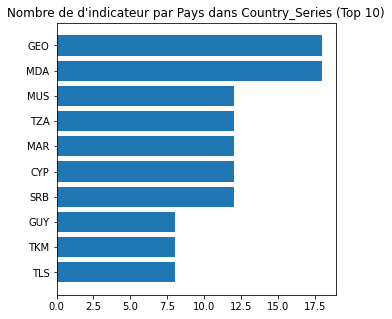

In [23]:
plt.figure(figsize=(5,5))
plt.barh(y = Country_Series.groupby('CountryCode')[['SeriesCode']].count().reset_index().sort_values(by='SeriesCode')['CountryCode'].tail(10), width = Country_Series.groupby('CountryCode')[['SeriesCode']].count()['SeriesCode'].sort_values().tail(10))
plt.title("Nombre de d'indicateur par Pays dans Country_Series (Top 10)")
plt.show()

### Analyse de FootNote.csv

In [24]:
FootNote.head(5) #print 5 first row of data

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


Le fichier FootNote.csv contient 643638 lignes et 5 colonnes. Il regroupe pour chaque pays sous forme de code associé au fichier Country un indicateur (SeriesCode) et une date (Year) ainsi qu'une description.

In [25]:
list_CountryCode_FootNote=FootNote['CountryCode'].nunique()
print('Le fichier FootNote regroupe %d code de pays différents' %(list_CountryCode_FootNote))

Le fichier FootNote regroupe 239 code de pays différents


In [26]:
list_unique_CountryCode_in_Country_not_Footnote = Country[~Country['Country Code'].isin(FootNote['CountryCode'])]['Country Code'].nunique()
print("Il y a dans le fichier Country.csv %d noms de pays qui ne figure pas dans FootNote.csv" %(list_unique_CountryCode_in_Country_not_Footnote))
print("_"*60)
print(Country[~Country['Country Code'].isin(FootNote['CountryCode'])]['Country Code'].unique())
list_unique_CountryCode_in_FootNote_not_Country = FootNote[~FootNote['CountryCode'].isin(Country['Country Code'])]['CountryCode'].nunique()
print("_"*60)
print("Il y a dans le fichier FootNote %d nom de pays qui ne figure pas dans Country.csv" %(list_unique_CountryCode_in_FootNote_not_Country))
print("_"*60)
print(FootNote[~FootNote['CountryCode'].isin(Country['Country Code'])]['CountryCode'].unique())

Il y a dans le fichier Country.csv 3 noms de pays qui ne figure pas dans FootNote.csv
____________________________________________________________
['GRL' 'MAF' 'SXM']
____________________________________________________________
Il y a dans le fichier FootNote 1 nom de pays qui ne figure pas dans Country.csv
____________________________________________________________
['VGB']


Il y a dans le fichier Footnote 239 codes de pays différents il font tous partie du fichier Country.csv à l'exception de 'VGB' qui est probablement une erreur de reférencement. Il faudra faire attention a cette ligne dans les autres datasets.
Contrairement a Country.csv FootNote ne contient pas d'information sur le Groenland et les deux partie de l'ile de saint martin.

In [27]:
FootNote[FootNote['CountryCode']=='VGB'].shape

(991, 5)

In [28]:
list_SeriesCode_FootNote=FootNote['SeriesCode'].nunique()
print('Le fichier FootNote regroupe %d indicateurs différents' %(list_SeriesCode_FootNote))

Le fichier FootNote regroupe 1558 indicateurs différents


In [29]:
list_Year_FootNote=FootNote['Year'].nunique()
print('Le fichier FootNote regroupe %d années différents' %(list_Year_FootNote))
print("_"*60)

print(FootNote['Year'].sort_values().unique())

Le fichier FootNote regroupe 56 années différents
____________________________________________________________
['YR1970' 'YR1971' 'YR1972' 'YR1973' 'YR1974' 'YR1975' 'YR1976' 'YR1977'
 'YR1978' 'YR1979' 'YR1980' 'YR1981' 'YR1982' 'YR1983' 'YR1984' 'YR1985'
 'YR1986' 'YR1987' 'YR1988' 'YR1989' 'YR1990' 'YR1991' 'YR1992' 'YR1993'
 'YR1994' 'YR1995' 'YR1996' 'YR1997' 'YR1998' 'YR1999' 'YR2000' 'YR2001'
 'YR2002' 'YR2003' 'YR2004' 'YR2005' 'YR2006' 'YR2007' 'YR2008' 'YR2009'
 'YR2010' 'YR2011' 'YR2012' 'YR2013' 'YR2014' 'YR2015' 'YR2016' 'YR2017'
 'YR2020' 'YR2025' 'YR2030' 'YR2035' 'YR2040' 'YR2045' 'YR2050' 'yr2012']


In [30]:
FootNote[FootNote['Year']=='yr2012']

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
150668,EAP,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
157898,ECA,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
172364,EMU,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
232331,HIC,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
308605,LAC,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
344095,LIC,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
354902,LMC,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
360606,LMY,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
404072,MIC,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN
416009,MNA,SP.POP.GROW,yr2012,5-year average value between 0s and 5s,NaN


In [31]:
list_DESCRIPTION_FootNote=FootNote['DESCRIPTION'].nunique()
print('Le fichier FootNote regroupe %d descriptions différents' %(list_DESCRIPTION_FootNote))
print("_"*60)
print(FootNote['DESCRIPTION'].unique())

Le fichier FootNote regroupe 9102 descriptions différents
____________________________________________________________
['Country estimation.' 'UIS Estimation'
 'UNESCO Institute for Statistics (UIS) estimate' ...
 'Uncertainty bound is 91.6 - 109.3' 'Uncertainty bound is 54.3 - 76'
 'Uncertainty bound is 48.3 - 73.3']


In [32]:
missing_value_by_column_FootNote=(FootNote.isnull().sum())
print('_'*60)
print(missing_value_by_column_FootNote)
print('_'*60)
print('Le fichier FootNote contient %d duplicates' %(FootNote.duplicated(keep=False).sum()))

____________________________________________________________
CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64
____________________________________________________________
Le fichier FootNote contient 0 duplicates


Le fichier FootNote.csv contient des informations supplémentaire sur 1558 indicateurs différents et 56 années pour 9102 descriptions differentes. Ses informations par exemple peuvent parler de l'incertitude sur une mesure ou la methode d'estimation.
La période d'obtention des données va de 1970 à 2017 (doublon en 2012) puis des prédictions tous les 5 ans de 2020 à 2050.
Le fichier est entièrement complet et ne comporte pas de données manquantes. Attention à yr2012 qui semble être un doublon ou une erreur.

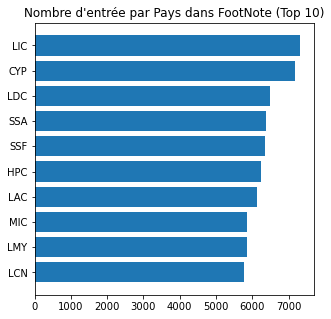

In [33]:
plt.figure(figsize=(5,5))
plt.barh(y = FootNote.groupby('CountryCode')[['SeriesCode']].count().reset_index().sort_values(by='SeriesCode')['CountryCode'].tail(10), width = FootNote.groupby('CountryCode')[['SeriesCode']].count()['SeriesCode'].sort_values().tail(10))
plt.title("Nombre d'entrée par Pays dans FootNote (Top 10)")
plt.show()

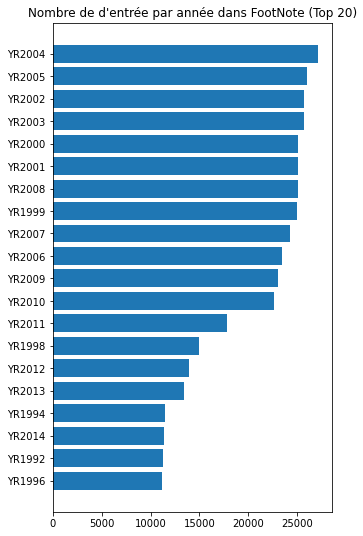

In [34]:
plt.figure(figsize=(5,9))
plt.barh(y = FootNote.groupby('Year')[['SeriesCode']].count().reset_index().sort_values(by='SeriesCode')['Year'].tail(20), width = FootNote.groupby('Year')[['SeriesCode']].count()['SeriesCode'].sort_values().tail(20))
plt.title("Nombre de d'entrée par année dans FootNote (Top 20)")
plt.show()

Le nombre d'entrée, c'est à dire d'information complémentaire, n'est pas répartie equitablement entre les pays et les années (voir graphiques ci dessus).

### Analyse de Series.csv

In [35]:
Series.head(5) #print 5 first row of data

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le fichier Series contient 3665 lignes et 21 colonnes. Chaque ligne est un indicateur (Series Code) regroupé dans un domaine (Topic) ainsi que son nom et sa définition (Indicator Name, Short Definition, Long Definition). Le reste des colonnes sont des informations complémentaires sur l'indicateur comme sa source ou son unité.

In [36]:
list_SeriesCode_Series=Series['Series Code'].nunique()
print('Le fichier Series regroupe %d indicateurs différents' %(list_SeriesCode_Series))

Le fichier Series regroupe 3665 indicateurs différents


In [37]:
list_unique_SeriesCode_in_Series_not_Footnote = Series[~Series['Series Code'].isin(FootNote['SeriesCode'])]['Series Code'].nunique()
print("Il y a dans le fichier Series.csv %d indicateurs qui ne figure pas dans FootNote.csv" %(list_unique_SeriesCode_in_Series_not_Footnote))
print("_"*60)
list_unique_SeriesCode_in_FootNote_not_Series = FootNote[~FootNote['SeriesCode'].isin(Series['Series Code'])]['SeriesCode'].nunique()
print("Il y a dans le fichier FootNote %d indicateurs qui ne figure pas dans Series.csv" %(list_unique_SeriesCode_in_FootNote_not_Series))
print(FootNote[~FootNote['SeriesCode'].isin(Series['Series Code'])]['SeriesCode'].unique())
List_unique_Pb_SeriesCode_in_FootNote_not_Series=FootNote[~FootNote['SeriesCode'].isin(Series['Series Code'])]['SeriesCode'].unique()
print("_"*60)
print("_"*60)
list_unique_SeriesCode_in_Series_not_CountrySeries = Series[~Series['Series Code'].isin(Country_Series['SeriesCode'])]['Series Code'].nunique()
print("Il y a dans le fichier Series.csv %d indicateurs qui ne figure pas dans Country_Series.csv" %(list_unique_SeriesCode_in_Series_not_CountrySeries))
print("_"*60)
list_unique_SeriesCode_in_CountrySeries_not_Series = Country_Series[~Country_Series['SeriesCode'].isin(Series['Series Code'])]['SeriesCode'].nunique()
print("Il y a dans le fichier Country_Series %d indicateurs qui ne figure pas dans Series.csv" %(list_unique_SeriesCode_in_CountrySeries_not_Series))
print(Country_Series[~Country_Series['SeriesCode'].isin(Series['Series Code'])]['SeriesCode'].unique())


Il y a dans le fichier Series.csv 2213 indicateurs qui ne figure pas dans FootNote.csv
____________________________________________________________
Il y a dans le fichier FootNote 106 indicateurs qui ne figure pas dans Series.csv
['UIS.XSpendP.23.FDpub.FNs' 'UIS.GER.1T6.F' 'UIS.GER.1T6.M'
 'UIS.LP.AG15T24' 'UIS.LP.AG15T24.F' 'UIS.LP.AG15T24.M' 'UIS.LP.AG15T99'
 'UIS.LP.AG15T99.F' 'UIS.LP.AG65' 'UIS.LP.AG65.M' 'UIS.LPP.AG15T99'
 'UIS.LPP.AG65' 'UIS.LR.AG15T99.GPI' 'UIS.LR.AG65.F' 'UIS.LR.AG65.M'
 'UIS.NIR.1.AGM1' 'UIS.NIR.1.AGM1.F' 'UIS.NIR.1.AGM1.M' 'UIS.NIR.1.AGP1'
 'UIS.NIR.1.AGP1.F' 'UIS.NIR.1.AGP1.M' 'UIS.OE.56.40510' 'UIS.SLE.1T6.GPI'
 'UIS.XGovExp.IMF.2' 'UIS.XGovExp.IMF.3' 'UIS.XSpendP.2.FDpub.FNcap'
 'UIS.XSpendP.2.FDpub.FNcur' 'UIS.XSpendP.2.FDpub.FNnons'
 'UIS.XSpendP.2.FDpub.FNs' 'UIS.XSpendP.3.FDpub.FNcap'
 'UIS.XSpendP.3.FDpub.FNcur' 'UIS.XSpendP.3.FDpub.FNnons'
 'UIS.XSpendP.3.FDpub.FNs' 'UIS.XUNIT.GDPcap.2.FSgov'
 'UIS.XUNIT.GDPcap.3.FSgov' 'SE.SEC.ENRR.UP.FE' 'UIS.E.1.P

Si on regarde de près, le fichier Series.csv contient tout les indicateurs référencés. Malheureusement certains du fichier FootNote ne semble pas avoir d'entré dans Series. Par conséquent on peut se demander d'ou viens se problème. Après une rapide lecture du Fichier Series il semble que l'indicateur existe bien mais que l'écriture soit différente (inversion des majuscule et minuscule entre les deux fichiers). 

In [38]:
list_unique_Topic_in_Series = Series['Topic'].nunique()
print("Il y a dans le fichier Series %d topic qui regroupe les differents indicateur" %(list_unique_Topic_in_Series))
print(Series['Topic'].unique())


Il y a dans le fichier Series 37 topic qui regroupe les differents indicateur
['Attainment' 'Education Equality' 'Infrastructure: Communications'
 'Learning Outcomes'
 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'
 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators'
 'Economic Policy & Debt: Purchasing power parity'
 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita'
 'Teachers' 'Education Management Information Systems (SABER)'
 'Early Child Development (SABER)' 'Engaging the Private Sector (SABER)'
 'School Health and School Feeding (SABER)'
 'School Autonomy and Accountability (SABER)' 'School Finance (SABER)'
 'Student Assessment (SABER)' 'Teachers (SABER)'
 'Tertiary Education (SABER)' 'Workforce Development (SABER)' 'Literacy'
 'Background' 'Primary' 'Secondary' 'Tertiary' 'Early Childhood Education'
 'Pre-Primary' 'Expenditures' 'Health: Risk factors' 'Health: Mortality'
 '

In [39]:
print((Series.isnull().sum()))
print('_'*60)
print('Le fichier Series contient %d duplicates' %(Series.duplicated(keep=False).sum()))

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64
____________________________________________________________
Le

Le fichier Series.csv contient donc 3665 lignes sans doublons. Les informations importantes comme l'indicateur,  son topic son nom et sa définition sont complétes. Attention a na pas prendre en compte la colonne 'Short Definition' qui contient des élèments manquants.
L'ensemble des 3665 indicateurs existants sont regroupés dans 37 topics distincts.

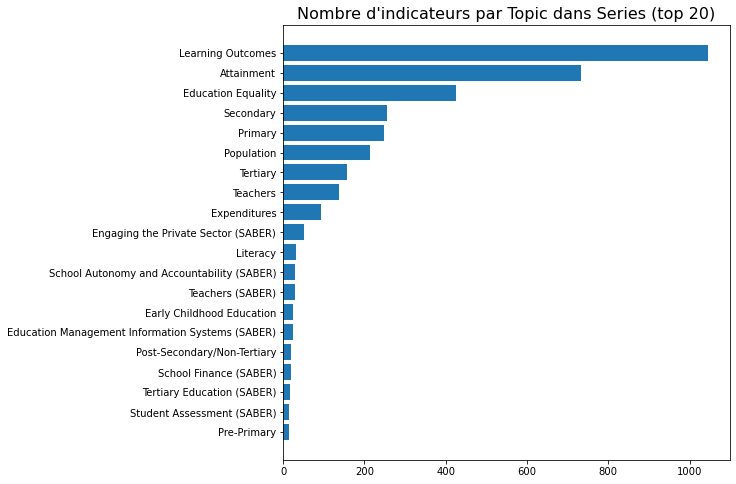

In [40]:
plt.figure(figsize=(8,8))
plt.barh(y = Series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(20), width = Series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(20))
plt.title("Nombre d'indicateurs par Topic dans Series (top 20)",fontsize=16)
plt.show()

### Analyse de Data.csv

In [41]:
Data.head(3) #print 3 first row of data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le fichier data est le plus grand fichiers dont nous disponsons avec 88693 lignes et 70 colonnes. Il regroupe sur chaque ligne le nom d'un pays, un indicateur et ses valeurs de 1970 à 2100.

In [42]:
list_CountryCode_Data=Data['Country Code'].nunique()
print('Le fichier Data regroupe %d code de pays différents' %(list_CountryCode_Data))

Le fichier Data regroupe 242 code de pays différents


In [43]:
list_unique_CountryCode_in_Data_not_Country = Data[~Data['Country Code'].isin(Country['Country Code'])]['Country Code'].nunique()
print("Il y a dans le fichier Data.csv %d nom de pays qui ne figure pas dans Country.csv" %(list_unique_CountryCode_in_Data_not_Country))
print("_"*60)
print(Data[~Data['Country Code'].isin(Country['Country Code'])]['Country Code'].unique())
list_unique_CountryCode_in_Country_not_Data = Country[~Country['Country Code'].isin(Data['Country Code'])]['Country Code'].nunique()
print("_"*60)
print("Il y a dans le fichier Country %d nom de pays qui ne figure pas dans Data.csv" %(list_unique_CountryCode_in_Country_not_Data))
print("_"*60)
print(Country[~Country['Country Code'].isin(Data['Country Code'])]['Country Code'].unique())

Il y a dans le fichier Data.csv 1 nom de pays qui ne figure pas dans Country.csv
____________________________________________________________
['VGB']
____________________________________________________________
Il y a dans le fichier Country 0 nom de pays qui ne figure pas dans Data.csv
____________________________________________________________
[]


Le fichier Data.csv reference l'ensemble des pays du fichier Country plus les iles vierges britanniques.

In [44]:
list_SeriesCode_Data=Data['Indicator Code'].nunique()
print('Le fichier Data regroupe %d indicateurs différents' %(list_SeriesCode_Data))

Le fichier Data regroupe 3665 indicateurs différents


In [45]:
list_unique_SeriesCode_in_Data_not_Series = Data[~Data['Indicator Code'].isin(Series['Series Code'])]['Indicator Code'].unique()
print("Il y a dans le fichier Data.csv %d indicateurs qui ne figure pas dans Series.csv" %(Data[~Data['Indicator Code'].isin(Series['Series Code'])]['Indicator Code'].nunique()))
print("_"*60)
print(list_unique_SeriesCode_in_Data_not_Series)
print("_"*60)
list_unique_SeriesCode_in_Series_not_Data=Series[~Series['Series Code'].isin(Data['Indicator Code'])]['Series Code'].unique()
print("_"*60)
print(list_unique_SeriesCode_in_Series_not_Data)

Il y a dans le fichier Data.csv 53 indicateurs qui ne figure pas dans Series.csv
____________________________________________________________
['UIS.LPP.AG15T99' 'UIS.LP.AG15T99' 'UIS.LP.AG15T99.F'
 'UIS.LR.AG15T99.GPI' 'UIS.XSPENDP.56.FDPUB.FNCAP'
 'UIS.XSPENDP.56.FDPUB.FNNONS' 'UIS.TRANRA.23.GPV.GPI' 'UIS.LPP.AG65'
 'UIS.LP.AG65' 'UIS.LP.AG65.M' 'UIS.LR.AG65.F' 'UIS.LR.AG65.M'
 'UIS.E.0.PU.F' 'UIS.E.2.PU.F' 'UIS.E.4.PU' 'UIS.E.4.PU.F' 'UIS.E.1.GUK'
 'UIS.E.1.GUK.F' 'UIS.E.1.PU' 'UIS.E.1.PU.F' 'UIS.E.23.PU' 'UIS.E.23.PU.F'
 'UIS.E.3.PU.F' 'UIS.XPUBP.4' 'UIS.XPUBP.0' 'UIS.XGDP.FSGOV.FDINSTADM.FFD'
 'UIS.XGDP.0.FSGOV.FDINSTADM.FFD' 'UIS.XGDP.1.FSGOV.FDINSTADM.FFD'
 'UIS.GER.1T6.F' 'UIS.GER.1T6.GPI' 'UIS.GER.1T6.M' 'SE.SEC.ENRR.UP.FE'
 'UIS.NIR.1.AGP1' 'UIS.NIR.1.AGP1.F' 'UIS.NIR.1.AGP1.M' 'UIS.NIR.1.AGM1'
 'UIS.NIR.1.AGM1.F' 'UIS.NIR.1.AGM1.M' 'UIS.CEAGE.1' 'UIS.THAGE.4.A.GPV'
 'UIS.THAGE.0' 'UIS.THAGE.3.A.GPV' 'UIS.FOSEP.56.FUK.F'
 'UIS.AIR.1.GLAST.GPI' 'UIS.SLE.1T6.GPI' 'UIS.SR.1.GLAST

Après une étude rapide nous voyons qu'il existe 53 indicateurs qui sont dans Data.csv mais pas dans Series.cvs et inversement. L'analyse nous montre que c'est essentiellement un problème de formatage dans l'ecriture (minuscule à la place de majuscule ou présence d'un espace à la fin du code). Nous allons resoudre ce problème.

In [46]:
Series_modif_SeriesCode=Series.copy()
Series_modif_SeriesCode.head()
for el in Series_modif_SeriesCode.index:
    if Series_modif_SeriesCode['Series Code'][el] in list_unique_SeriesCode_in_Series_not_Data:
        Series_modif_SeriesCode['Series Code'][el]=Series_modif_SeriesCode['Series Code'][el].upper()

<ipython-input-46-e99d598b04cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series_modif_SeriesCode['Series Code'][el]=Series_modif_SeriesCode['Series Code'][el].upper()


In [47]:
list_unique_SeriesCode_in_Data_not_Series2 = Data[~Data['Indicator Code'].isin(Series_modif_SeriesCode['Series Code'])]['Indicator Code'].unique()
print("Il y a dans le fichier Data.csv %d indicateurs qui ne figure pas dans Series_modif_SeriesCode" %(Data[~Data['Indicator Code'].isin(Series_modif_SeriesCode['Series Code'])]['Indicator Code'].nunique()))
print("_"*60)
print(list_unique_SeriesCode_in_Data_not_Series2)
print("_"*60)
list_unique_SeriesCode_in_Series2_not_Data=Series[~Series_modif_SeriesCode['Series Code'].isin(Data['Indicator Code'])]['Series Code'].unique()
print("_"*60)
print(list_unique_SeriesCode_in_Series2_not_Data)

Il y a dans le fichier Data.csv 3 indicateurs qui ne figure pas dans Series_modif_SeriesCode
____________________________________________________________
['SE.SEC.ENRR.UP.FE' 'SE.SEC.DURS.LO' 'UIS.OE.56.40510']
____________________________________________________________
____________________________________________________________
['SE.SEC.DURS.LO ' 'SE.SEC.ENRR.UP.FE ' 'UIS.OE.56.40510 ']


In [48]:
for el in Series_modif_SeriesCode.index:
    if Series_modif_SeriesCode['Series Code'][el] in list_unique_SeriesCode_in_Series2_not_Data:
        Series_modif_SeriesCode['Series Code'][el]=Series_modif_SeriesCode['Series Code'][el][:-1]

<ipython-input-48-fe2939cbde2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series_modif_SeriesCode['Series Code'][el]=Series_modif_SeriesCode['Series Code'][el][:-1]


In [49]:
list_unique_SeriesCode_in_Data_not_Series3 = Data[~Data['Indicator Code'].isin(Series_modif_SeriesCode['Series Code'])]['Indicator Code'].unique()
print("Il y a dans le fichier Data.csv %d indicateurs qui ne figure pas dans Series_modif_SeriesCode" %(Data[~Data['Indicator Code'].isin(Series_modif_SeriesCode['Series Code'])]['Indicator Code'].nunique()))
print("_"*60)
print(list_unique_SeriesCode_in_Data_not_Series3)
print("_"*60)
list_unique_SeriesCode_in_Series3_not_Data=Series[~Series_modif_SeriesCode['Series Code'].isin(Data['Indicator Code'])]['Series Code'].unique()
print("_"*60)
print(list_unique_SeriesCode_in_Series3_not_Data)

Il y a dans le fichier Data.csv 0 indicateurs qui ne figure pas dans Series_modif_SeriesCode
____________________________________________________________
[]
____________________________________________________________
____________________________________________________________
[]


Tous les indicateurs que regroupe Data sont contenues dans Serie à la différences près de 53 indicateurs dont l'écriture différe par cause de conversion minuscule-majuscule ou d'un espace à la fin du code. Tous les problèmes d'indicateur ont été résolues et sont conforme avec le dataset Series_modif_SeriesCode. 
Sinon le fichier ne contient pas de doublons car 3665 indicateurs * 242 pays = 886 930 lignes ce qui correspond à la longueur de notre dataset.


In [50]:
missing_value_by_column_Data=(Data.isnull().sum())
print('_'*60)
print(missing_value_by_column_Data)
print('_'*60)
print('Le fichier Data contient %d duplicates' %(Data.duplicated(keep=False).sum()))

____________________________________________________________
Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003          

In [51]:
print('Le fichier Data.csv contient %f pourcent de données manquantes' %(100*missing_value_by_column_Data.sum()/(Data.shape[0]*Data.shape[1])) )

Le fichier Data.csv contient 86.099852 pourcent de données manquantes


Les quatres premieres colonnes principales nous donnant le nom du pays et l'indicateur concerné sont pleins. Les autres colonnes (données par années) sont en majoritées vides. Compte tenu du nombre d'année étudiée (64, soit plus que dans FootNote) le fichier complet contiendrait 56 763 520 données chiffrées. Bien entendu si on se base sur les donnée s de FootNote (que nous savons incomplétes) il existe 643 638 informations de bas de pages donc seulement 1% des données environ. D'après nos estimations 86% du fichiers Data.csv sont des valeurs manquantes.

D'après une rapide analyse du nombre de données manquants par colonnes, on se rend compte qu'il n'y à pas le meme nombre d'information par année. Le taux de remplissage le plus haut est pour les années 1990-2015.

In [52]:
print('taux de remplissage par colonne')
print('_'*60)
#print(    100*(len(Data)-Data.isnull().sum())/len(Data) )
tx_remplissage=100*(len(Data)-Data.isnull().sum())/len(Data)
print(tx_remplissage)

taux de remplissage par colonne
____________________________________________________________
Country Name      100.000000
Country Code      100.000000
Indicator Name    100.000000
Indicator Code    100.000000
1970                8.150361
1971                4.006742
1972                4.015988
1973                4.007644
1974                4.028503
1975                9.843618
1976                4.226151
1977                4.236411
1978                4.236636
1979                4.150158
1980               10.048369
1981                4.372047
1982                4.229308
1983                4.336306
1984                4.352767
1985               10.180736
1986                4.439133
1987                4.356714
1988                4.346679
1989                4.232578
1990               14.026473
1991                8.392658
1992                8.517358
1993                8.545545
1994                8.733722
1995               14.810752
1996                8.659872
1997    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


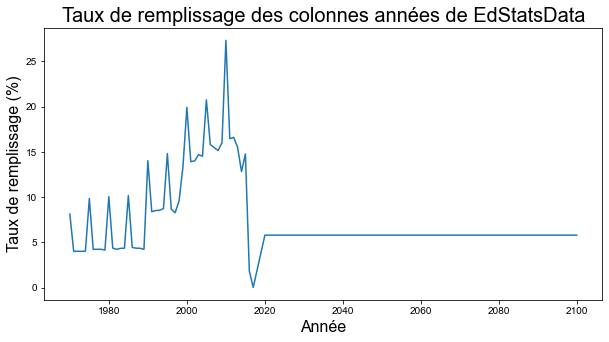

In [53]:

plt.figure(figsize=(10,5))
ax=plt.gca()
sns.set_style("whitegrid")
tx_remplissage_index=np.zeros(69-4)
tx_remplissage_value=np.zeros(69-4)
for i in range (4,69):
    tx_remplissage_index[i-4]=int(tx_remplissage.index[i])
    tx_remplissage_value[i-4]=tx_remplissage[i]
sns.lineplot(tx_remplissage_index, tx_remplissage_value)
plt.title("Taux de remplissage des colonnes années de EdStatsData", fontsize=20)
#plt.xlabel('Année')
#plt.ylabel('Taux de remplissage (%)')
ax.set_xlabel('Année',fontsize=16);
ax.set_ylabel('Taux de remplissage (%)',fontsize=16);
#plt.show()


On remarque que le taux de remplissage par année des indicateurs n'est pas constant. Si on exclu les valeurs crêtes on remarque que le nombre d'informations dans le fichier Data.csv augmente jusqu'aux environs de 2010. Pendant cette periode, il existe des points remarquables tous les 5 ans avec une augmentation de 5% du taux de remplissage cela doit correspondre à une sortie de donnée commandé par l'ONU par exemple ou par la banque mondiale. 
Pour ce qui est des predictions (après 2020) le nombre de donnée est constante jusqu'à 2100 mais à un niveau faible. Il faudra donc vérifier que nos indicateurs fasse bien partie de ceux ayant des prédictions.

In [54]:
Country_col=['Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31']
Country_modif=Country.copy()
Country_modif.drop(Country_col,axis=1)

Data_joined=Data.merge(right = Country_modif[['Country Code', 'Region', 'Income Group']],
                      on = 'Country Code', how= 'left')
Data_joined.sample(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69,Region,Income Group
442364,Italy,ITA,Rate of out-of-school youth of upper secondary...,UIS.ROFST.3.CP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.71369,18.78703,18.19607,15.74137,15.00483,13.45879,12.54429,9.4065,10.44128,6.79305,7.38426,5.86648,9.78168,10.35466,7.09838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income: OECD
32430,High income,HIC,"UIS: Adjusted net attendance rate, primary, mi...",UIS.NARA.1.Q3.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous avons fait une jointure avec les colonnes importantes du fichier Country.csv pour garder toutes les données essentielles dans un seul et même fichier.

### Synthèse pré-analyse des datasets

Le jeu de données comporte cinq datasets. voici leurs interets et leurs dimensions:
* Data: le fichier EdStatsData.csv regroupe en 886930 lignes et 70 colonnes l'ensemble des données numérique nécessaires à notre étude. Il donne ,pour chaque couple de pays et d'indicateur, la valeur numérique correspondant de 1970 à 2100. Le ficher comporte de nombreuses données manquantes et leurs nombres varie en fonction de l'année. Nous avons déterminé que le taux de remplissage maximal etait atteitn pour l'année 2010. Le fichier en revanche ne contient aucun doublon.
* Series: le fichier EdStatsSeries.csv regroupe en 3665 lignes et 21 colonnes l'ensemble des données descriptives sur les indicateurs socio économiques disponibles dans Data (au nombre de 3665 indicateurs). Le fichier comporte de nombreuses colonnes entièrement vide. Seule la colonne 'Long Definition' nous apporte des informations plus importantes sur le contenu de l'indicateur (contrairement à 'Short Definition' qui comporte beaucoup de valeurs manquantes). Ce fichier et cette colonne en particulier seront très utiles pour repondre à la problématique de l'entreprises. Aucun doublon.
* Country : le fichier EdStatsCountry.csv regroupe en 241 lignes et 32 colonnes l'ensemble des informations globales sur un pays ou groupe de pays et son économie (au nombre de 214 pays et 27 regroupement de pays). Le fichier comporte de nombreuses colonnes entièrement vides. Seule les colonnes 'Region' et 'Income Group' seront utile pour notre étude car regroupant les pays par région du monde ou groupe de revenu. Ces données seront éssentielles pour les représentations graphiques. Aucun doublon.
* Country Series: le fichier EdStatsCountry-Series.csv regroupe en 613 lignes et 4 colonnes des informations à propos de la provenance des données du fichier EdStatsCountry.csv. Une seule colonne, la dernière nommée 'Unnamed: 3" est entièrement vide et pourrais donc etre supprimée. Neanmoins les informations de ce fichier ne semble pas importantes pour notre étude. Aucun doublon.
* FootNote: le fichier EdStatsFootNote.csv regroupe en 643638 lignes et 5 colonnes des informations complémentaires sur les année d'origine des données de EdStatsData.csv. Ces informations peuvent être de types : méthode de calcul ou incertitude sur la mesure par exemple.  Une seule colonne, la dernière nommée 'Unnamed: 4" est entièrement vide et pourrais donc etre supprimée. Neanmoins les informations de ce fichier ne semble pas importantes pour notre étude. Aucun doublon.

### Synthèse sur le dataset

* le dataset comporte bien des données relatifs à l'éducation dans les pays du monde mais également des données socio économiques.
* Tous les pays du monde sont représentés.
* Le nombre de donnée semble suffisamment important pour procéder à une analyses comparatives.
* Un dataframe Data_joined a été crée pour regrouper en une seule entité l'ensemble des colonnes nécessaires à l'étude.
* Pour la mise en graphique les données de l'année 2010 sont à privilégié car en nombre plus important dans le dataset que les autres.
* Quelques modifications ont été apportées aux fichiers afin des les données et notamment les codes d'indicateurs soient concordant dans chacun des fichiers. Ce n'etait pas entièrement le cas dans les fichiers d'origine. C'est pourquoi un dataframe Series_modif_SeriesCode à été crée.

## Analyse exploratoire des données

### Problématique de l'entreprise

> Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

> Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

> Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

> Quels sont les pays avec un fort potentiel de clients pour nos services ?
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Dans quels pays l'entreprise doit-elle opérer en priorité ?"

Compte tenu de l'entreprise pour laquelle nous travaillons et les objectifs de celle ci nous devons rechercher les indicateurs contenu dans note base de données qui nous serons utiles pour déterminer une liste de pays à prospecter.

L'entreprise fournisant du contenu de formation en ligne, les utilisateurs doivent disposer d'un **ordinateur** et d'un **accès à internet**. 

Le public visé étant de niveau lycée à université, nous devrons définir par pays quelle est le **nombre d'étudiant à ce niveau de formation**.
Nous devrons également définir le **taux d'étudiants parmis la population cible**. De cette facon nous pourrons identifier les personnes étant susceptible de faire appelle à Academy pour leurs formations. Ces personnes ont entre 15 et 24 ans.

Il faut aussi que les personnes soient en capacités de payer le contenu de formation. Il est donc important de prendre en compte le **facteur economique du pays** comme le PIB PPP qui donne une imformation sur le niveau de vie d'un pays. Une information sur l'**économie des étudiants** en particuliers serait un plus. 

Pour finir nous devons repondre à la question de l'évolution du potentiel de client dans les années à venir. Pour cela nous pouvons soit prendre en compte la **croissance de population dans le pay**s soit regarder la **génération précedentes** à celle que nous étudions donc par exemple 10-15 ans afin de voir comment va évoluer la source de client. Egalement **les données prévisionnelle** du jeu de donnée pourrais etre utiles pour repondre à cette question.


### Recherche des indicateurs

In [55]:
Code_internet=Series[Series["Long definition"].str.contains("Internet")]['Series Code'].unique() 
print(Code_internet[0]) #accès à internet

Code_computer=Series[Series["Long definition"].str.contains("computer")]['Series Code'].unique()
print(Code_computer[0]) #accès à un ordinateur

print('_'*40)

Code_PIB_corrected=Series[Series["Indicator Name"].str.contains("GDP, PPP")]['Series Code'].unique()
print(Code_PIB_corrected[0]) #PIB corrigé par pays

print('_'*40)

Code_1524_pop_tot=Series[Series["Series Code"].str.contains("SP.POP.1524")]['Series Code'].unique()
print(Code_1524_pop_tot[2]) #population 15 24 ans

Code_1015_pop_tot=Series[Series["Series Code"].str.contains("SP.POP.1015")]['Series Code'].unique()
print(Code_1015_pop_tot[2]) #population 10 15 ans

Code_pop_grow=Series[Series["Series Code"].str.contains("SP.POP.GROW")]['Series Code'].unique()
print(Code_pop_grow[0]) #croissance de population

Code_pop_tot=Series[Series["Series Code"].str.contains("SP.POP.TOTL")]['Series Code'].unique()
print(Code_pop_tot[0]) #population totale

print('_'*40)

Code_pop_tertiary=Series[Series["Series Code"].str.contains('SE.TER.ENRL')]['Series Code'].unique()
print(Code_pop_tertiary[0]) #population à l'université


Code_pop_upper_secondary=Series[Series["Series Code"].str.contains('UIS.E.3')]['Series Code'].unique()
print(Code_pop_upper_secondary[0]) #population au lycée


Code_pop_post_secondary=Series[Series["Series Code"].str.contains('UIS.E.4')]['Series Code'].unique()
print(Code_pop_post_secondary[0]) #population post lycée non université


IT.NET.USER.P2
IT.CMP.PCMP.P2
________________________________________
NY.GDP.MKTP.PP.CD
________________________________________
SP.POP.1524.TO.UN
SP.POP.1015.TO.UN
SP.POP.GROW
SP.POP.TOTL
________________________________________
SE.TER.ENRL
UIS.E.3
UIS.E.4


In [56]:
Indicateurs =[Code_internet[0],Code_computer[0],Code_PIB_corrected[0],Code_1524_pop_tot[2],Code_1015_pop_tot[2],
             Code_pop_grow[0],Code_pop_tot[0],Code_pop_tertiary[0],Code_pop_upper_secondary[0],Code_pop_post_secondary[0]]
print(Indicateurs)

['IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'NY.GDP.MKTP.PP.CD', 'SP.POP.1524.TO.UN', 'SP.POP.1015.TO.UN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SE.TER.ENRL', 'UIS.E.3', 'UIS.E.4']


Voici la liste des indicateurs pré-selectionnés:
* **IT.Net.User.P2** Taux d'internet pour 100 personnes
* **IT.CMP.PCMP.P2** Nombre d'ordinateur personnel pour 100 personnes

* **NY.GDP.MKTP.PP.CD** PIB ppp ...
* **Nan**               Indicateur d'argent par etudiant (non trouvé)

* **SP.POP.1524.TO.UN** total de la population agée de 15 à 24 ans
* **SP.POP.1015.TO.UN** total de la population agée de 10 à 15 ans
* **SP.POP.GROW**       augmentation de la population...
* **SP.POP.TOTL**       total de la population

* **SE.TER.ENRL**  Personnes inscrites à l'université
* **UIS.E.3**      Personnes inscrites au lycée
* **UIS.E.4**      Personnes inscrites en formation post-bac

In [57]:
Data_joined['1970s'] = Data_joined[[str(year) for year in range(1970,1980,1)]].mean(1)

Data_joined['1980s'] = Data_joined[[str(year) for year in range(1980,1990,1)]].mean(1)
Data_joined['1990s'] = Data_joined[[str(year) for year in range(1990,2000,1)]].mean(1)
Data_joined['2000s'] = Data_joined[[str(year) for year in range(2000,2010,1)]].mean(1)
Data_joined['2010s'] = Data_joined[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
Data_joined['2020s'] = Data_joined[[str(year) for year in [2020,2025]]].mean(1)
Data_joined['2030s'] = Data_joined[[str(year) for year in [2030,2035]]].mean(1)
Data_joined['2040s'] = Data_joined[[str(year) for year in [2040,2045]]].mean(1)
Data_joined['2050s'] = Data_joined[[str(year) for year in [2050,2055]]].mean(1)
Data_joined['2060s'] = Data_joined[[str(year) for year in [2060,2065]]].mean(1)
Data_joined['2070s'] = Data_joined[[str(year) for year in [2070,2075]]].mean(1)
Data_joined['2080s'] = Data_joined[[str(year) for year in [2080,2085]]].mean(1)
Data_joined['2090s'] = Data_joined[[str(year) for year in [2090,2095]]].mean(1)
Data_joined['2100s'] = Data_joined[[str(2100)]].mean(1)

In [58]:
Data_joined.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'], axis=1, inplace=True)

In [59]:
Data_joined.shape

(886930, 20)

In [60]:
Data_joined.to_csv('EdStatsData2.csv', index=False)

La liste des colonnes de Data a été modifié. En effet les années sont maintenants regroupés par décenies pour prendre en compte que certains pays peuvent sortir leurs informations statistiques de manière périodique. Ainsi le pays A peut avoir ses données chaque année, le pays B uniquement tous les 5 ans a partir de 1975 et le pays C seulement tout les 10 ans à partir de 1981. Dans ce cas prendre les données d'une seule année pourrais éliminer des pays de taille moyenne.
Cela permet aussi de diminuer fortement la taille du fichier data en passant à seulement 20 colonnes au lieu de 72.

In [61]:
Data_joined[Data_joined['Indicator Code'].isin(Indicateurs)][['Indicator Name','Indicator Code','2010s']].groupby(['Indicator Name','Indicator Code']).count().sort_values(by='2010s',ascending=False).reset_index()

,Indicator Name,Indicator Code,2010s
0,Population growth (annual %),SP.POP.GROW,240
1,"Population, total",SP.POP.TOTL,240
2,Internet users (per 100 people),IT.NET.USER.P2,229
3,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,217
4,"Enrolment in upper secondary education, both s...",UIS.E.3,206
5,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,197
6,"Population, ages 10-15, total",SP.POP.1015.TO.UN,181
7,"Population, ages 15-24, total",SP.POP.1524.TO.UN,181
8,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,137
9,Personal computers (per 100 people),IT.CMP.PCMP.P2,0


On voit d'après le tableau précedent que le nombre d'information en fonction de nos indicateurs est très variable.
Alors que la population et la crissance de population à une valeur numérique pour 240 des 242 pays, nous ne disposons d'aucune information sur le taux d'ordinateur personnel par personne en 2010s. Cette information est peut etre trop nouvelle. Une vision à long terme est peut etre plus envisageable.

In [62]:
Data_joined[Data_joined['Indicator Code'].isin(Indicateurs)][['Indicator Name','Indicator Code','2050s']].groupby(['Indicator Name','Indicator Code']).count().sort_values(by='2050s',ascending=False).reset_index()

,Indicator Name,Indicator Code,2050s
0,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,0
1,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,0
2,"Enrolment in upper secondary education, both s...",UIS.E.3,0
3,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,0
4,Internet users (per 100 people),IT.NET.USER.P2,0
5,Personal computers (per 100 people),IT.CMP.PCMP.P2,0
6,Population growth (annual %),SP.POP.GROW,0
7,"Population, ages 10-15, total",SP.POP.1015.TO.UN,0
8,"Population, ages 15-24, total",SP.POP.1524.TO.UN,0
9,"Population, total",SP.POP.TOTL,0


Aucun des indicateurs que nous avons choisit possédent de données numériques pour les années 2050s. Nous ne pourrons donc les utiliser pour les prédictions à long termes. Par définition nous pouvons donc supprimer le code relatif aux ordinateurs personnels de notre liste d'indicateur.

In [63]:
Indicateurs.remove('IT.CMP.PCMP.P2')
print(Indicateurs)

['IT.NET.USER.P2', 'NY.GDP.MKTP.PP.CD', 'SP.POP.1524.TO.UN', 'SP.POP.1015.TO.UN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SE.TER.ENRL', 'UIS.E.3', 'UIS.E.4']


Il convient également de supprimer toutes les lignes qui ne nous interesse pas car nous n'avons pas les valeurs necessaires à la resolution de notre projet. Par exemple nous remarquons que seulement 95 pays ont une informations sur les post-bacs, 165 sur les universités et 174 sur les lycées.
Par conséquent nous cherchons à éliminer de notre base de donnée tous les pays qui n'ont pas d'information concernant le lycée. Car il est possible que certains petits pays ne dispose pas d'université propre mais surtout pas de formations post bac.

In [64]:
Data_joined_corrected=Data_joined.copy()

In [65]:
import math
indexNames=[]
Dropped_Country=[]
for i in range(Data_joined_corrected.shape[0]):
    if Data_joined_corrected['Indicator Code'][i]=='UIS.E.3':
        if math.isnan(Data_joined_corrected['2010s'][i]):
            indexNames.append( Data_joined_corrected[ Data_joined_corrected['Country Code'] == Data_joined_corrected['Country Code'][i] ].index)
            Dropped_Country.append(Data_joined_corrected['Country Name'][i])
        else:
            continue
    else:
        continue
        
for i in range(len(indexNames)):
    Data_joined_corrected.drop(indexNames[i] , inplace=True)
    
print(len(Dropped_Country))
print(Dropped_Country)

36
['American Samoa', 'British Virgin Islands', 'Cambodia', 'Channel Islands', 'Equatorial Guinea', 'Faroe Islands', 'French Polynesia', 'Gabon', 'Gibraltar', 'Greenland', 'Guam', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Isle of Man', 'Kiribati', 'Korea, Dem. People’s Rep.', 'Kosovo', 'Libya', 'Maldives', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Namibia', 'New Caledonia', 'Northern Mariana Islands', 'Senegal', 'Singapore', 'Somalia', 'South Sudan', 'St. Martin (French part)', 'Tonga', 'Trinidad and Tobago', 'Uganda', 'Vietnam', 'Virgin Islands (U.S.)', 'Zambia']


In [66]:
Data_joined_corrected[Data_joined_corrected['Indicator Code'].isin(Indicateurs)][['Indicator Name','Indicator Code','2010s']].groupby(['Indicator Name','Indicator Code']).count().sort_values(by='2010s',ascending=False).reset_index()

,Indicator Name,Indicator Code,2010s
0,"Enrolment in upper secondary education, both s...",UIS.E.3,206
1,Population growth (annual %),SP.POP.GROW,205
2,"Population, total",SP.POP.TOTL,205
3,Internet users (per 100 people),IT.NET.USER.P2,201
4,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,196
5,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,187
6,"Population, ages 10-15, total",SP.POP.1015.TO.UN,162
7,"Population, ages 15-24, total",SP.POP.1524.TO.UN,162
8,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,132


J'ai considéré que les pays dont on ne disposait pas d'information en 2010s concernant le nombre d'etudiant au lycée n'etait pas viable. Cela m'a permis d'enlever 36 pays de la liste initiale de 242. La majorité des pays enlevée sont des petits pays et des iles.

In [67]:
Data_joined_corrected.reset_index(drop = True, inplace = True) 
import math
indexNames=[]
Dropped_Country=[]
for i in range(Data_joined_corrected.shape[0]):
    if Data_joined_corrected['Indicator Code'][i]=='IT.NET.USER.P2':
        if math.isnan(Data_joined_corrected['2010s'][i]):
            indexNames.append( Data_joined_corrected[ Data_joined_corrected['Country Code'] == Data_joined_corrected['Country Code'][i] ].index)
            Dropped_Country.append(Data_joined_corrected['Country Name'][i])
        else:
            continue
    else:
        continue
        
for i in range(len(indexNames)):
    Data_joined_corrected.drop(indexNames[i] , inplace=True)
    
print(len(Dropped_Country))
print(Dropped_Country)

5
['Curacao', 'Nauru', 'Palau', 'Sint Maarten (Dutch part)', 'Turks and Caicos Islands']


In [68]:
Data_joined_corrected[Data_joined_corrected['Indicator Code'].isin(Indicateurs)][['Indicator Name','Indicator Code','2010s']].groupby(['Indicator Name','Indicator Code']).count().sort_values(by='2010s',ascending=False).reset_index()

,Indicator Name,Indicator Code,2010s
0,"Enrolment in upper secondary education, both s...",UIS.E.3,201
1,Internet users (per 100 people),IT.NET.USER.P2,201
2,Population growth (annual %),SP.POP.GROW,201
3,"Population, total",SP.POP.TOTL,201
4,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,195
5,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,183
6,"Population, ages 10-15, total",SP.POP.1015.TO.UN,162
7,"Population, ages 15-24, total",SP.POP.1524.TO.UN,162
8,Enrolment in post-secondary non-tertiary educa...,UIS.E.4,130


En tenant compte du fait que le taux d'internet par pays etait primordiale pour notre étude il à été possible de supprimer encore 5 petits pays de la liste. Maintenant nous disponsons de 201 pays. L'indicateur le moins rempli concerne les études post bac. 

In [69]:
def mise_en_colonnes (df_lignes,annees='2010s'):
    N_pays=[]
    C_pays=[]
    N_regi=[]
    N_grou=[]
    T_inte=[]
    T_PIBp=[]
    P_1015=[]
    P_1524=[]
    P_tota=[]
    P_croi=[]
    E_lyce=[]
    E_post=[]
    E_facu=[]
    for pays in Data_joined_corrected['Country Name'].unique():
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='IT.NET.USER.P2')]
        N_pays.append(df_temp['Country Name'].unique()[0])
        C_pays.append(df_temp['Country Code'].unique()[0])
        N_regi.append(df_temp['Region'].unique()[0])
        N_grou.append(df_temp['Income Group'].unique()[0])
        T_inte.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='NY.GDP.MKTP.PP.CD')]
        T_PIBp.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='SP.POP.1015.TO.UN')]
        P_1015.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='SP.POP.1524.TO.UN')]
        P_1524.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='SP.POP.TOTL')]
        P_tota.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='SP.POP.GROW')]
        P_croi.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='UIS.E.3')]
        E_lyce.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='UIS.E.4')]
        E_post.append(df_temp[annees].unique()[0])
        df_temp=Data_joined_corrected[(Data_joined_corrected['Country Name']==pays) & (Data_joined_corrected['Indicator Code']=='SE.TER.ENRL')]
        E_facu.append(df_temp[annees].unique()[0])
        
    ar = {'Nom pays':N_pays, 'Code pays':C_pays,
          'Region':N_regi,'Groupe financier': N_grou,'Taux internet': T_inte,'PIB': T_PIBp,'Pop 1015': P_1015,
          'Pop 1524':P_1524,'Pop totale': P_tota,'Pop croissance': P_croi,'Etudiants lycee': E_lyce,
          'Etudiants post bac':E_post,'Etudiants fac': E_facu}
    df = pd.DataFrame(ar)
    return df

In [70]:
df_completed_2010=mise_en_colonnes(Data_joined_corrected)
df_completed_2010

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Etudiants lycee,Etudiants post bac,Etudiants fac
0,Arab World,ARB,NaN,NaN,31.834459,5.480091e+12,NaN,NaN,3.587756e+08,2.108820,1.166203e+07,2.631211e+05,9.222392e+06
1,East Asia & Pacific,EAS,NaN,NaN,43.754148,3.241375e+13,NaN,NaN,2.250835e+09,0.677126,6.963781e+07,2.302949e+06,6.014131e+07
2,East Asia & Pacific (excluding high income),EAP,NaN,NaN,38.968510,2.271777e+13,NaN,NaN,2.007695e+09,0.721368,6.231434e+07,1.844454e+06,5.080623e+07
3,Euro area,EMU,NaN,NaN,75.580997,1.320307e+13,NaN,NaN,3.376978e+08,0.234261,1.296676e+07,1.101148e+06,1.288954e+07
4,Europe & Central Asia,ECS,NaN,NaN,65.538253,2.620036e+13,NaN,NaN,8.994497e+08,0.420616,3.388402e+07,2.020099e+06,3.861509e+07
5,Europe & Central Asia (excluding high income),ECA,NaN,NaN,51.297737,7.412876e+12,NaN,NaN,4.102482e+08,0.558187,1.369279e+07,6.241610e+05,1.907368e+07
6,European Union,EUU,NaN,NaN,72.846488,1.743247e+13,NaN,NaN,5.057606e+08,0.165110,2.077958e+07,1.454795e+06,2.005959e+07
7,Heavily indebted poor countries (HIPC),HPC,NaN,NaN,9.205370,1.400659e+12,NaN,NaN,6.862718e+08,2.823769,1.077222e+07,5.929243e+05,4.727721e+06
8,High income,HIC,NaN,NaN,76.846043,5.058981e+13,NaN,NaN,1.169169e+09,0.590461,4.461304e+07,3.131460e+06,5.401195e+07
9,Latin America & Caribbean,LCN,NaN,NaN,46.132005,9.109707e+12,NaN,NaN,6.173007e+08,1.131912,2.432931e+07,3.910977e+05,2.314855e+07


In [71]:
df_completed_2010.shape

(201, 13)

La fonction 'mise en colonne' que j'ai ecrit, permet de diminuer drastiquement la taille de notre fichier de travail. en effet il est maintenant composé d'une ligne par pays. Sur cette ligne chaque colonne est une grandeur importante ou une donnée numérique d'un des indicateurs selectionnés pour la décénie 2010.

In [72]:
df_completed_2010['Evol pop 1024']=100*(((9/5)*df_completed_2010['Pop 1015'])-df_completed_2010['Pop 1524'])/df_completed_2010['Pop 1524']

In [73]:
df_completed_2010['Pop etudiants']=df_completed_2010['Etudiants lycee']+df_completed_2010['Etudiants post bac']+df_completed_2010['Etudiants fac']
df_completed_2010['Taux etudiants']=(df_completed_2010['Pop etudiants']/df_completed_2010['Pop 1524'])*100
df_completed_2010=df_completed_2010.drop(['Etudiants lycee', 'Etudiants post bac', 'Etudiants fac'], axis=1)

In [74]:
print(df_completed_2010.shape)

(201, 13)


In [75]:
df_completed_2010

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants
0,Arab World,ARB,NaN,NaN,31.834459,5.480091e+12,NaN,NaN,3.587756e+08,2.108820,NaN,2.114755e+07,NaN
1,East Asia & Pacific,EAS,NaN,NaN,43.754148,3.241375e+13,NaN,NaN,2.250835e+09,0.677126,NaN,1.320821e+08,NaN
2,East Asia & Pacific (excluding high income),EAP,NaN,NaN,38.968510,2.271777e+13,NaN,NaN,2.007695e+09,0.721368,NaN,1.149650e+08,NaN
3,Euro area,EMU,NaN,NaN,75.580997,1.320307e+13,NaN,NaN,3.376978e+08,0.234261,NaN,2.695745e+07,NaN
4,Europe & Central Asia,ECS,NaN,NaN,65.538253,2.620036e+13,NaN,NaN,8.994497e+08,0.420616,NaN,7.451920e+07,NaN
5,Europe & Central Asia (excluding high income),ECA,NaN,NaN,51.297737,7.412876e+12,NaN,NaN,4.102482e+08,0.558187,NaN,3.339063e+07,NaN
6,European Union,EUU,NaN,NaN,72.846488,1.743247e+13,NaN,NaN,5.057606e+08,0.165110,NaN,4.229397e+07,NaN
7,Heavily indebted poor countries (HIPC),HPC,NaN,NaN,9.205370,1.400659e+12,NaN,NaN,6.862718e+08,2.823769,NaN,1.609287e+07,NaN
8,High income,HIC,NaN,NaN,76.846043,5.058981e+13,NaN,NaN,1.169169e+09,0.590461,NaN,1.017565e+08,NaN
9,Latin America & Caribbean,LCN,NaN,NaN,46.132005,9.109707e+12,NaN,NaN,6.173007e+08,1.131912,NaN,4.786895e+07,NaN


Nous avons fait des opérations sur les indicateurs afin de créer des variables plus représentatives. En effet c'est le cas du nombre d'étudiants qui est la somme des étudiants en lycéee, post bac et université. 
De même nous avons crée une variable 'Evol pop 1024', celui ci donne le taux de remplacement des 15-24 ans par les 10-15 ans. cela donne une idée de la distribution des ages dans la population. Mais pour nous cela sert surtout à dire si à court terme la population cible va avoir tendance à augmenter ou diminuer.

In [76]:
df_region_2010=df_completed_2010[df_completed_2010['Region'].isna()]
df_country_2010=df_completed_2010[~df_completed_2010['Region'].isna()]
df_country_2010

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants
25,Afghanistan,AFG,South Asia,Low income,6.601467,5.735191e+10,5.035599e+06,6.679801e+06,3.172728e+07,3.044466,35.693834,1.103189e+06,16.515295
26,Albania,ALB,Europe & Central Asia,Upper middle income,56.510334,3.125238e+10,3.092558e+05,5.856280e+05,2.894231e+06,-0.253139,-4.946399,3.059922e+05,52.250262
27,Algeria,DZA,Middle East & North Africa,Upper middle income,25.535075,5.304779e+11,3.639084e+06,6.869491e+06,3.834750e+07,1.933563,-4.645760,NaN,NaN
28,Andorra,AND,Europe & Central Asia,High income: nonOECD,90.453580,NaN,NaN,NaN,8.084814e+04,-1.269337,NaN,2.192000e+03,NaN
29,Angola,AGO,Sub-Saharan Africa,Upper middle income,8.128571,1.638464e+11,2.937675e+06,4.018651e+06,2.603935e+07,3.501825,31.581849,NaN,NaN
30,Antigua and Barbuda,ATG,Latin America & Caribbean,High income: nonOECD,61.597143,1.975079e+09,NaN,NaN,9.782029e+04,1.084668,NaN,4.954250e+03,NaN
31,Argentina,ARG,Latin America & Caribbean,Upper middle income,59.227690,8.381862e+11,4.060154e+06,6.873357e+06,4.253773e+07,1.029265,6.327620,NaN,NaN
32,Armenia,ARM,Europe & Central Asia,Lower middle income,44.589312,2.286698e+10,2.118918e+05,5.133975e+05,2.896616e+06,0.178074,-25.709553,NaN,NaN
33,Aruba,ABW,Latin America & Caribbean,High income: nonOECD,78.554812,3.671232e+09,8.817500e+03,1.386183e+04,1.032063e+05,0.466686,14.497842,NaN,NaN
34,Australia,AUS,East Asia & Pacific,High income: OECD,82.105767,1.020770e+12,1.611947e+06,2.921038e+06,2.308494e+07,1.520121,-0.668720,2.677543e+06,91.664081


In [77]:
df_country_2010.shape

(176, 13)

Dans notre étude nous allons prospecter uniquement des pays et non des régions c'est pourquoi tout les regroupement géographique ou économique sont supprimé de notre fichier d'étude.

In [78]:
df_country_2010.to_csv('EdStatsF.csv', index=False)

In [79]:
def stats_describe (df):
    value=[]
    Mean=[]
    Std=[]
    Min=[]
    M25=[]
    M50=[]
    M75=[]
    Max=[]
    P_min=[]
    P_max=[]
    value.append((100-(df.isna().sum()/df.shape[0])*100).values[4:])
    Mean.append(df.mean().values)
    Std.append(df.std().values)
    Min.append(df.min().values[4:])
    M50.append(df.median().values)
    Max.append(df.max().values[4:])
    i=0
    for col in df.columns[4:]:
        if not(math.isnan(Min[0][i]) & math.isnan(Max[0][i])) :
            P_min.append(df[df[col]==Min[0][i]]['Nom pays'].values[0])
            P_max.append(df[df[col]==Max[0][i]]['Nom pays'].values[0])
        else:
            P_min.append(np.nan)
            P_max.append(np.nan)            
        i+=1
    df_final=pd.DataFrame([value[0], Mean[0], Std[0],Min[0], P_min, M50[0], Max[0],P_max], columns=df.columns[4:],
                         index=['Taux valeur %','Moyenne','Std','Minimum','Pays min','Mediane','Maximum','Pays max'])
    return df_final

In [80]:
stats_country_2010=stats_describe(df_country_2010)
stats_country_2010

,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants
Taux valeur %,100,96.5909,92.0455,92.0455,100,100,92.0455,54.5455,51.1364
Moyenne,44.3303,5.99484e+11,4.27617e+06,7.13549e+06,3.90416e+07,1.35466,8.49046,3.53774e+06,48.9078
Std,28.2743,1.98777e+12,1.49233e+07,2.56599e+07,1.44728e+08,1.33116,16.7152,1.21087e+07,25.1487
Minimum,0.894407,3.62263e+07,8817.5,13861.8,10815.6,-1.74492,-34.4941,2192,2.74209
Pays min,Eritrea,Tuvalu,Aruba,Aruba,Tuvalu,Syrian Arab Republic,"Macao SAR, China",Andorra,Niger
Mediane,44.5875,6.96792e+10,832964,1.32233e+06,7.83316e+06,1.22867,6.5894,506981,52.5896
Maximum,96.5095,1.6886e+13,1.48501e+08,2.40163e+08,1.35772e+09,6.8515,50.4721,8.10319e+07,94.4762
Pays max,Iceland,China,India,India,China,Qatar,Niger,India,Finland


Nous obtenons grace a la donction 'stats_describe' la liste des pays ou des regions dans le top et le flop de chacun de nos indicateurs
* le nombre d'habitants, le nombre d'etudiants et le PIB sont dominé naturellement par le regroupement monde
* à l'inverse c'est dans les pays les moins doté financiérement que nous retrouvons naturellement le PIB le plus bas mais également le taux d'internet et le nombre d'étudiants le plus bas. Sans argent il est difficile de financer une éducation de haut degré et de financer également la transition numérique, les résultats sont donc logiques.
* Concernant les pays c'est naturellement en chine et en inde que nous retrouvons les pays les plus peuplé en terme de population totale, par tranche d'age ou en nombre d'étudiants. Le taux d'etudiants le plus important est en Finlande avec 94.5% des 15-24 ans, le taux d'internet le plus important est en iceland avec 96.5% de la population y ayant accées et c'est au Quatar que la croissance de population est le plus élevé,
* inversement c'est dans les petits pays pauvre que nous retrouvons les pays les plus faibles de nos indicateurs avec l'Erytré, le tuvalu et l'aruba par exemple. le plus petits nombre d'etudiant est en andorre (pays riche mais très petit) et c'est au niger que le taux d'etudiants parmis les 15-24 ans est le plus faible avec seulement 2.7%

Etudions maintenant les distribution pour déterminer si il existe plusieurs mode pour chacun des indicateurs ou si la distribution est uniforme

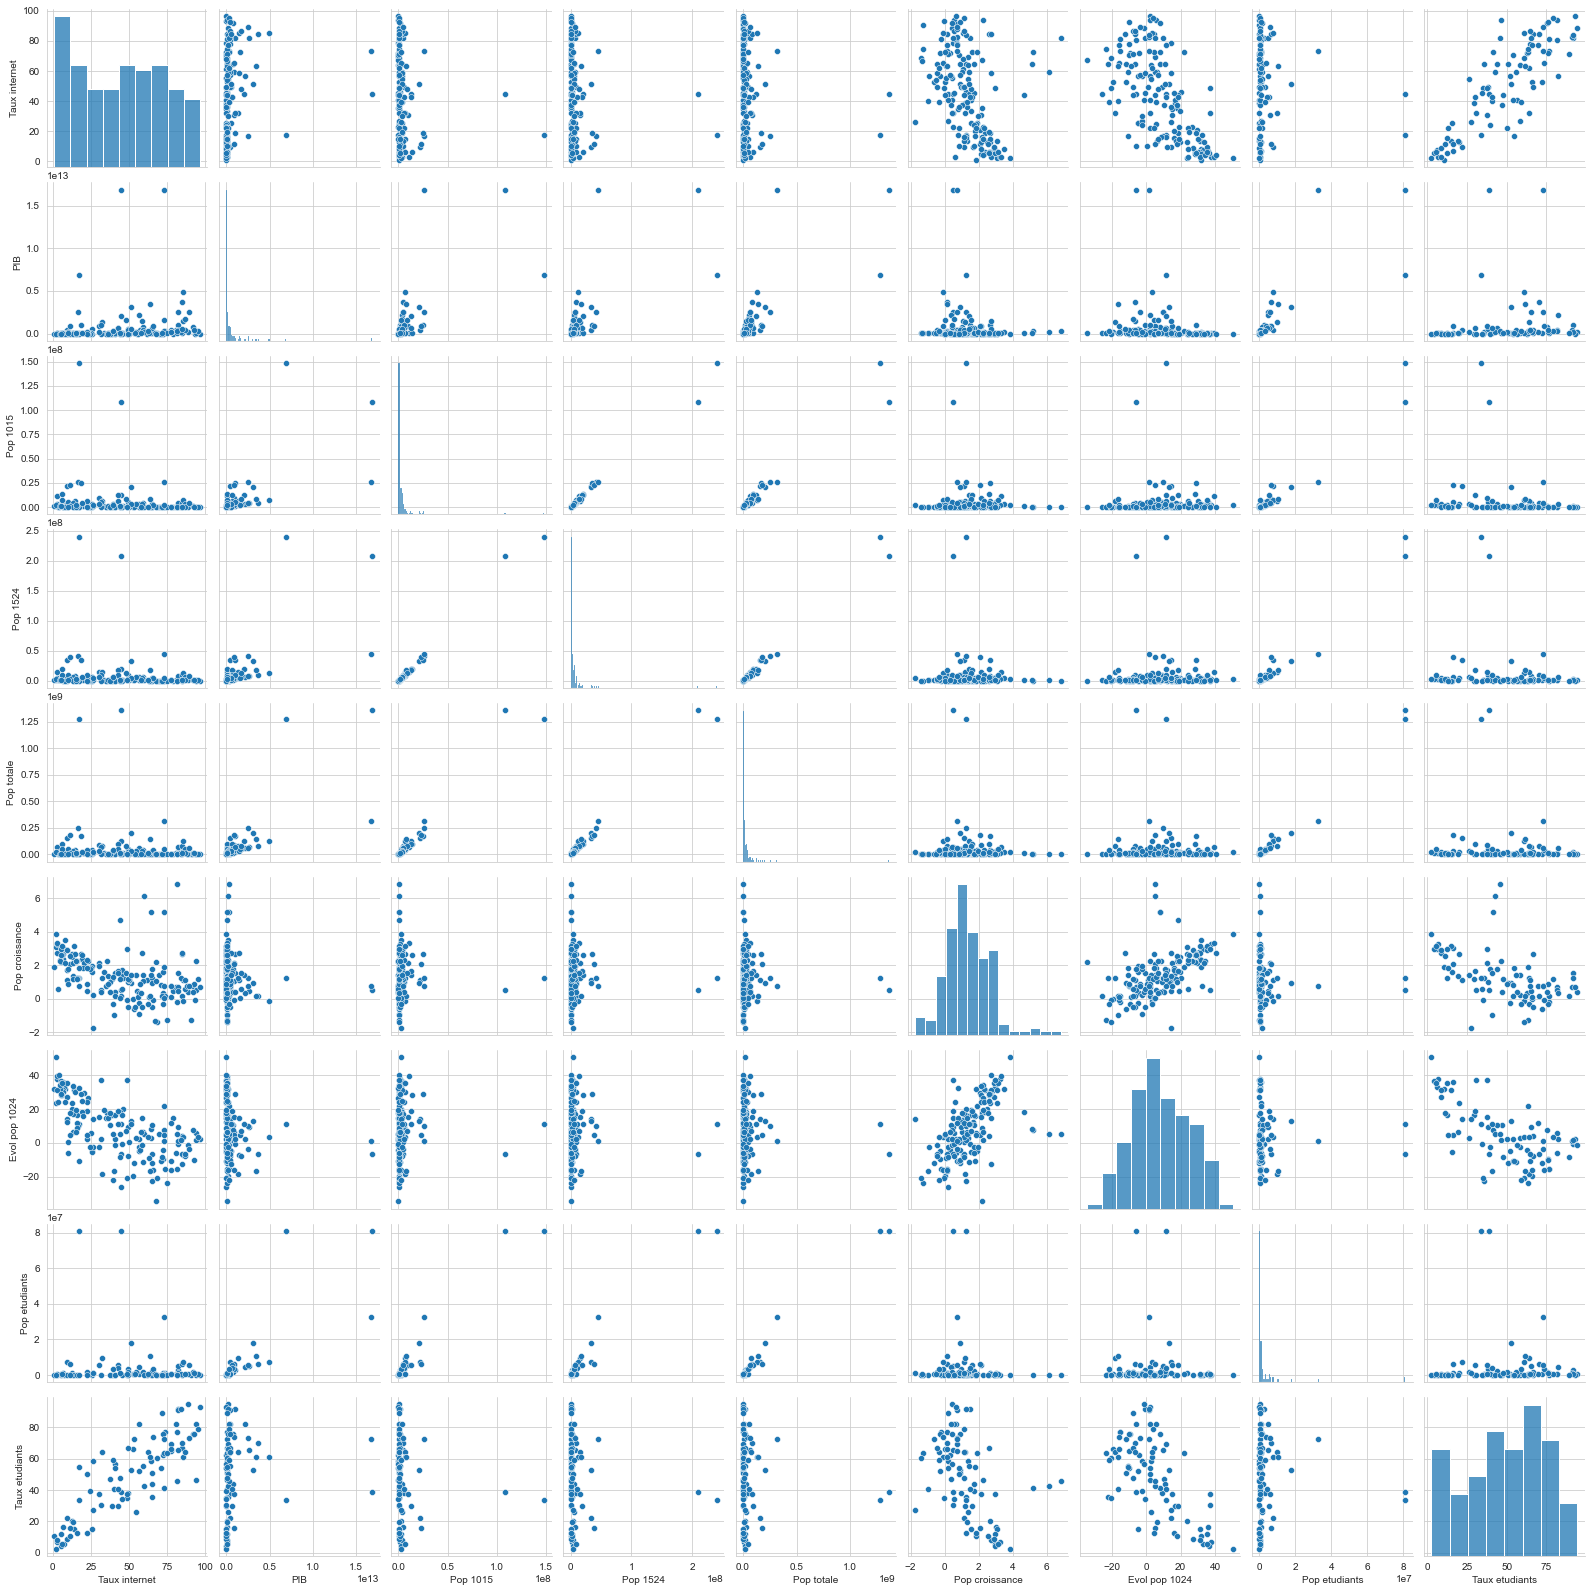

In [81]:
sns.pairplot(df_country_2010)

faisont la liste des correlations entre nos variables ainsi que leurs distributions:
* Taux internet : la distribution est reparti linéairement autant de pays dans chaque valeurs. Cette variable semble corrélé avec le taux d'etudiants (on peut faire l'hypothése que plus un pays est dévellopé, donc avec un accent sur les hauts degré d'etudes, plus les moyens de réussite sont à dispositins avec un accès a internet important). Il semble également y avoir une corrélation avec les croissances de population (les pays dévellopés sont connues pour avoir une croissance plus faible)
* PIB: beaucoup de pays ayant un faible PIB, distribution très inégales. Aucune corrélation visible
* Pop 1015, Pop 1524, Pop totale et Pop Etudiants : distribution très inégales avec beaucoup de pays ayant une faible population. Les 4 variables sont fortements corréles entre elles. En effet plus il y'à de monde plus il y'a aussi de jeune et aussi d'etudiants.
* Population croissance et Evol pop 1024: distribution proche d'une normale centré. Forte corrélation entre les deux variables qui sont naturellement qu'une manière différente de calculer. corrélation avec le taux d'internet et le taux d'étudiants.
* Taux d'étudiants : distribution plates et corrélation déja évoqué.

Skew   gamma1 0.775419
Kurtosis   gamma2 2.032408


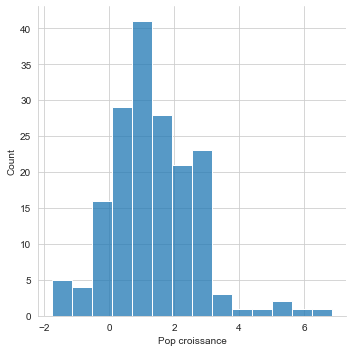

In [82]:
sns.displot(df_country_2010, x="Pop croissance")
print('Skew   gamma1 %f' %(df_country_2010['Pop croissance'].skew()))
print('Kurtosis   gamma2 %f' %(df_country_2010['Pop croissance'].kurtosis()))

Skew   gamma1 0.107557
Kurtosis   gamma2 -1.245749


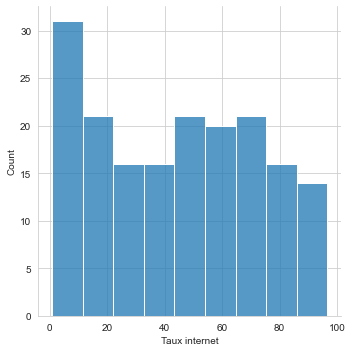

In [83]:
sns.displot(df_country_2010, x="Taux internet")
print('Skew   gamma1 %f' %(df_country_2010['Taux internet'].skew()))
print('Kurtosis   gamma2 %f' %(df_country_2010['Taux internet'].kurtosis()))

Skew   gamma1 8.076272
Kurtosis   gamma2 69.612537


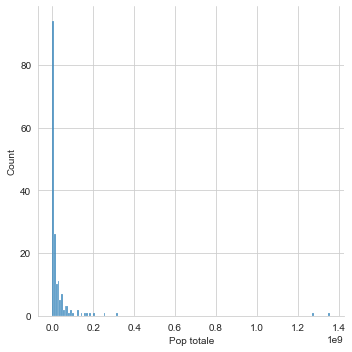

In [84]:
sns.displot(df_country_2010, x="Pop totale")
print('Skew   gamma1 %f' %(df_country_2010['Pop totale'].skew()))
print('Kurtosis   gamma2 %f' %(df_country_2010['Pop totale'].kurtosis()))

Nous avons remarqué grace à la fonction PAIRPLOT que mes indicateurs suivent 3 distribution différentes:
* les indicateurs de croissances (Pop croissance et evol pop 1024) suivent une distribution en forme de cloche. 
* les indicateurs de taux (taux internet et taux d'etudiants) sont quand à elle des distributions plates,
* les indicateurs de population et de PIB sont des distributions très assymétriques.
Cette annalyse nous permets de voir que pour tout ce qui concerna la population et le PIB, la représentation la plus adapté est le logarithme naturelle.

<AxesSubplot:>

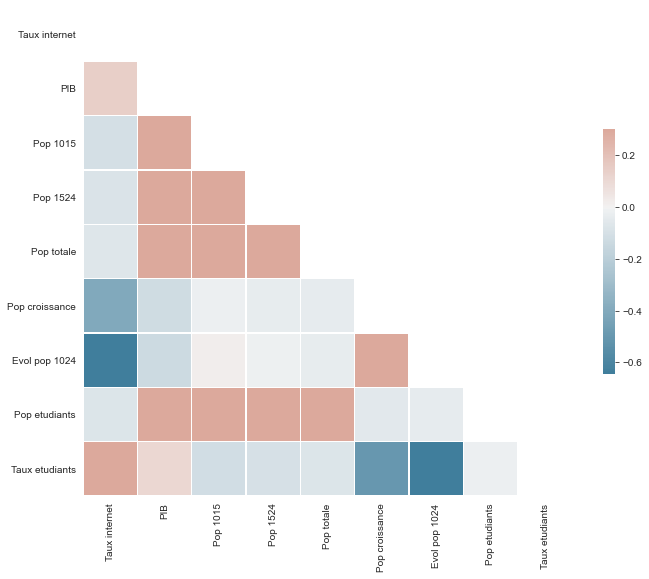

In [85]:
correlation=df_country_2010.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

La fonction Heatmap ci dessus montre en fausse couleur le coefficient de correlation de Pearson pour chacun des couples possible de nos indicateurs. Couplé à la fonction PAIRPLOT précedentes nous retrouvons conclusions très proches. Cela nous permet de définir quand dans la recherche de solution à la problématique du client nous pourrons réaliser des graphiques qui sont si possible de deux variables non corrélés.

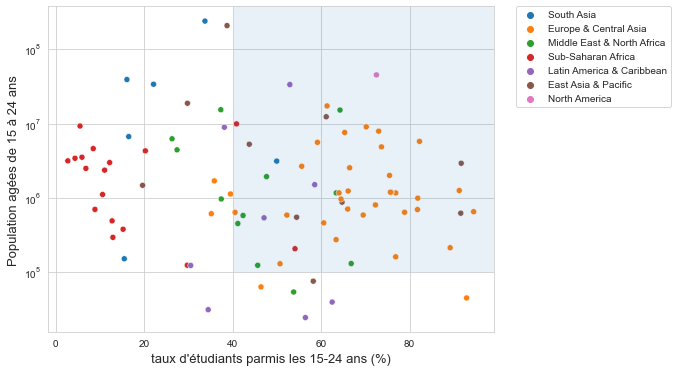

In [86]:
import matplotlib.patches as patches
plt.figure(figsize=(8,6))
ax=plt.gca()
sns.set_style("whitegrid")
g=sns.scatterplot(x=df_country_2010['Taux etudiants'], y=df_country_2010['Pop 1524'], hue=df_country_2010['Region'])
g.set_yscale("log")
ax.add_patch(patches.Rectangle((40, 100000), 60, 500000000, alpha=0.1))
ax.set_xlabel("taux d'étudiants parmis les 15-24 ans (%)",fontsize=13)
ax.set_ylabel("Population agées de 15 à 24 ans",fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Nous pouvons observer que l'accés à internet n'est pas équitablement répartie entre les régions du monde et c'est une de nos variables les plus importantes pour faire notre choix. Si on fait l'hypothése qu'il faut suffisamment de monde pour s'implemter dans un pays (10e5 personnes en age d'etre au lycée ou en fac) et un accés à internet conséquent (plus de 40%) nous voyons que la liste des pays potentiels d'implamtation va fortement diminuer. En effet tous le spays d'afrique sub saharienne vont de fait etre exclu de même qu'une majorité des pays d'amérique latine et carrabéen.

In [87]:
df_country_2010.shape

(176, 13)

In [88]:
df_country_2010_step2=df_country_2010[(df_country_2010['Taux etudiants']>40) &(df_country_2010['Pop 1524']>100000)]
df_country_2010_step2.shape

(51, 13)

Après notre premier tri de pays nous passons d'une liste de 176 pays référencés à seulement 51 qui correspondent à nos critéres.

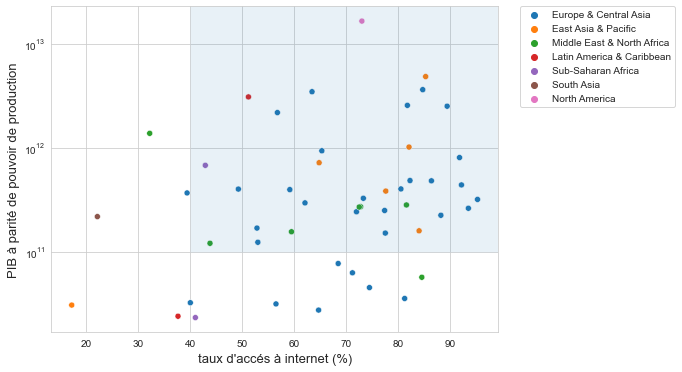

In [89]:
plt.figure(figsize=(8,6))
ax=plt.gca()
sns.set_style("whitegrid")
g=sns.scatterplot(x=df_country_2010_step2['Taux internet'], y=df_country_2010_step2['PIB'], hue=df_country_2010_step2['Region'])
g.set_yscale("log")
ax.add_patch(patches.Rectangle((40, 100000000000), 60, 50000000000000, alpha=0.1))
ax.set_xlabel("taux d'accés à internet (%)",fontsize=13)
ax.set_ylabel("PIB à parité de pouvoir de production",fontsize=13)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Pour pouvoir accéder au formations en ligne l'étudiants va devoir débourser de l'argent c'est pourquoi nous allons définir un PIB mini de 10^11. Il faut aussi des étudiants de tout niveau dans le pays (lycée, post bac et université) c'est pourquoi nous définisons un taux d'etudiants de 40% minimum.

In [90]:
print(df_country_2010_step2.shape)
df_country_2010_step3=df_country_2010_step2[(df_country_2010_step2['Taux internet']>40) &(df_country_2010_step2['PIB']>100000000000)]
print(df_country_2010_step3.shape)

(51, 13)
(36, 13)


Ce second tri à permis une diminution de 15 pays dans notre liste. Le totale de pays encore en lise est de 36 pour l'instant.

Maintenant nous allons nous interrogé sur l'evolution de la population cible dans nos pays pré-selectionné. Des indicateurs comme le PIB ne peuvent pas diminuer (sauf grave crise imprevisible) de même le taux d'internet dans ces pays ne peux qu'augmenter. En effet l'infrastructure numérique etan déja en place elle ne peux disparaitre. 
Enfin le constat est le même pour le taux d'etudiants, sauf grave crise, il devrait être relativement constant ou en augmentation.
C'est pourquoi la seule chose qui peut influencer dans les deux sens la population cible pour notre client est l'évolution de la population au cours des années. C'est pourquoi notre 3ième tri se fera en fonction du taux de croissance de la population et du taux de remplassement par les 10-15 ans.

Text(0, 0.5, 'Taux de croissance de la population (%)')

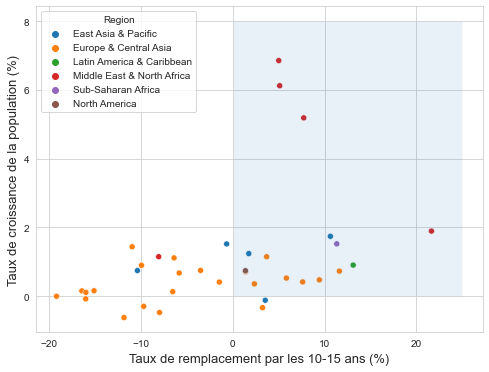

In [91]:
plt.figure(figsize=(8,6))
ax=plt.gca()
sns.set_style("whitegrid")
g=sns.scatterplot(x=df_country_2010_step3['Evol pop 1024'], y=df_country_2010_step3['Pop croissance'], hue=df_country_2010_step3['Region'])
ax.add_patch(patches.Rectangle((0, 0), 25, 8, alpha=0.1))
ax.set_xlabel("Taux de remplacement par les 10-15 ans (%)",fontsize=13)
ax.set_ylabel("Taux de croissance de la population (%)",fontsize=13)

In [92]:
print(df_country_2010_step3.shape)
df_country_2010_step4=df_country_2010_step3[(df_country_2010_step3['Evol pop 1024']>0) &(df_country_2010_step3['Pop croissance']>0)]
print(df_country_2010_step4.shape)

(36, 13)
(16, 13)


In [93]:
df_country_2010_step4

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants
42,Belgium,BEL,Europe & Central Asia,High income: OECD,82.295655,4.850011e+11,7.067055e+05,1.254599e+06,1.115512e+07,0.711917,1.392575,1.144504e+06,91.224692
50,Brazil,BRA,Latin America & Caribbean,Upper middle income,51.214529,3.110627e+12,2.107136e+07,3.353126e+07,2.023258e+08,0.905739,13.113686,1.774776e+07,52.928991
73,Denmark,DNK,Europe & Central Asia,High income: OECD,93.529716,2.619240e+11,4.082715e+05,6.943373e+05,5.626119e+06,0.528175,5.840298,5.678448e+05,81.782270
85,France,FRA,Europe & Central Asia,High income: OECD,81.789500,2.579083e+12,4.610035e+06,7.582918e+06,6.598297e+07,0.475296,9.430990,4.954075e+06,65.332044
102,Ireland,IRL,Europe & Central Asia,High income: OECD,77.412824,2.492602e+11,3.635128e+05,5.862387e+05,4.627042e+06,0.729817,11.613774,4.074803e+05,69.507584
103,Israel,ISR,Middle East & North Africa,High income: OECD,72.796118,2.712218e+11,7.868557e+05,1.164389e+06,8.071757e+06,1.894441,21.638026,7.382459e+05,63.401984
104,Italy,ITA,Europe & Central Asia,High income: OECD,56.780535,2.196162e+12,3.273969e+06,5.757578e+06,6.007869e+07,0.359316,2.354572,4.734863e+06,82.237058
111,Kuwait,KWT,Middle East & North Africa,High income: nonOECD,72.524246,2.690989e+11,2.696950e+05,4.506333e+05,3.564843e+06,5.185630,7.726385,1.855557e+05,41.176640
125,Malaysia,MYS,East Asia & Pacific,Upper middle income,64.810759,7.208884e+11,3.240243e+06,5.272092e+06,2.968043e+07,1.742844,10.628521,2.307053e+06,43.759722
139,Netherlands,NLD,Europe & Central Asia,High income: OECD,91.822593,8.082953e+11,1.197190e+06,2.002537e+06,1.681303e+07,0.415646,7.610650,1.511170e+06,75.462777


Grâce à ce troisième et dernier tri, nous avons sélectionné une liste de 16 pays dont fait parti la France qui regroupe l'ensmeble des conditions nécessaire à la prospection et l'implantation de notre client.
Nous alons maintenant étudier la répartition de ces pays dans le monde et définir un classement de ces pays vis à vis de chacun de nos critères de selection.

In [94]:
df_country_selection_finale=df_country_2010_step4.drop([85]) #enlève la france du groupe de pays selectionné
df_country_selection_finale.groupby("Region")[['Nom pays']].count()['Nom pays'].sort_values(ascending=False)

Region
Europe & Central Asia         6
Middle East & North Africa    4
East Asia & Pacific           2
Sub-Saharan Africa            1
North America                 1
Latin America & Caribbean     1
Name: Nom pays, dtype: int64

Voici la répartition des pays que nous proposons à l'entreprise comme nouvelles zones de prospection: 
* 2 pays dans l'asie de l'est et le pacific : la malaisie et la nouvelle zelande
* 6 pays en europe et asie centrale : Belgique, Ireland, italie, pays bas, norvege et le danemark
* 4 pays en afrique du nord et moyen orient : israel, koweit, oman et le quatar
* 1 pays en amérqiue latine et carraibe : le brasil
* 1 pays en amérique du nord : les états unis
* 1 pays en afrique sub-saharienne: l'afrique du sud

Il ne reste plus qu'a definir un classement de prospection en fonction des resultats au différents test precedents. 

In [95]:
df_country_selection_finale['Test 1']=df_country_selection_finale['Taux etudiants']*np.log10(df_country_selection_finale['Pop 1524'])
df_country_selection_finale['Test 2']=df_country_selection_finale['Taux internet']*np.log10(df_country_selection_finale['PIB'])
df_country_selection_finale['Test 3']=df_country_selection_finale['Evol pop 1024']*(df_country_selection_finale['Pop croissance'])

In [96]:
df_country_selection_finale

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants,Test 1,Test 2,Test 3
42,Belgium,BEL,Europe & Central Asia,High income: OECD,82.295655,4.850011e+11,7.067055e+05,1.254599e+06,1.115512e+07,0.711917,1.392575,1.144504e+06,91.224692,556.334223,961.685855,0.991398
50,Brazil,BRA,Latin America & Caribbean,Upper middle income,51.214529,3.110627e+12,2.107136e+07,3.353126e+07,2.023258e+08,0.905739,13.113686,1.774776e+07,52.928991,398.314467,639.815322,11.877572
73,Denmark,DNK,Europe & Central Asia,High income: OECD,93.529716,2.619240e+11,4.082715e+05,6.943373e+05,5.626119e+06,0.528175,5.840298,5.678448e+05,81.782270,477.736898,1067.938686,3.084698
102,Ireland,IRL,Europe & Central Asia,High income: OECD,77.412824,2.492602e+11,3.635128e+05,5.862387e+05,4.627042e+06,0.729817,11.613774,4.074803e+05,69.507584,400.924920,882.247079,8.475927
103,Israel,ISR,Middle East & North Africa,High income: OECD,72.796118,2.712218e+11,7.868557e+05,1.164389e+06,8.071757e+06,1.894441,21.638026,7.382459e+05,63.401984,384.602659,832.301648,40.991963
104,Italy,ITA,Europe & Central Asia,High income: OECD,56.780535,2.196162e+12,3.273969e+06,5.757578e+06,6.007869e+07,0.359316,2.354572,4.734863e+06,82.237058,555.942238,700.766307,0.846036
111,Kuwait,KWT,Middle East & North Africa,High income: nonOECD,72.524246,2.690989e+11,2.696950e+05,4.506333e+05,3.564843e+06,5.185630,7.726385,1.855557e+05,41.176640,232.805449,828.945742,40.066178
125,Malaysia,MYS,East Asia & Pacific,Upper middle income,64.810759,7.208884e+11,3.240243e+06,5.272092e+06,2.968043e+07,1.742844,10.628521,2.307053e+06,43.759722,294.152106,768.517431,18.523849
139,Netherlands,NLD,Europe & Central Asia,High income: OECD,91.822593,8.082953e+11,1.197190e+06,2.002537e+06,1.681303e+07,0.415646,7.610650,1.511170e+06,75.462777,475.534763,1093.383960,3.163334
140,New Zealand,NZL,East Asia & Pacific,High income: OECD,84.043935,1.587037e+11,3.510855e+05,6.211088e+05,4.483286e+06,1.239837,1.746082,5.687141e+05,91.564329,530.447516,941.341408,2.164857


In [97]:
df_class_test1=df_country_selection_finale.sort_values(by='Test 1', ascending=False)[['Nom pays','Test 1']].reset_index(drop=True)
df_class_test1['Class test 1']=df_class_test1.index
df_class_test1

,Nom pays,Test 1,Class test 1
0,Belgium,556.334223,0
1,Italy,555.942238,1
2,United States,555.022269,2
3,New Zealand,530.447516,3
4,Denmark,477.736898,4
5,Netherlands,475.534763,5
6,Norway,457.844251,6
7,Ireland,400.924920,7
8,Brazil,398.314467,8
9,Israel,384.602659,9


Du test numéro 1 (taux d'étudiant et population cible 15-24 ans) le pays le plus attractif est la belgique et les pays du moyen-orient les moins attirants.

In [98]:
df_class_test2=df_country_selection_finale.sort_values(by='Test 2', ascending=False)[['Nom pays','Test 2']].reset_index(drop=True)
df_class_test2['Class test 2']=df_class_test2.index
df_class_test2

,Nom pays,Test 2,Class test 2
0,Norway,1096.107565,0
1,Netherlands,1093.383960,1
2,Denmark,1067.938686,2
3,United States,965.884871,3
4,Belgium,961.685855,4
5,New Zealand,941.341408,5
6,Qatar,934.432100,6
7,Ireland,882.247079,7
8,Israel,832.301648,8
9,Kuwait,828.945742,9


Du test numéro 2 (taux d'accès a internet et PIB) le pays le plus attractif est la norvége et le moins attirant l'afrique du sud.

In [99]:
df_class_test3=df_country_selection_finale.sort_values(by='Test 3', ascending=False)[['Nom pays','Test 3']].reset_index(drop=True)
df_class_test3['Class test 3']=df_class_test3.index
df_class_test3

,Nom pays,Test 3,Class test 3
0,Israel,40.991963,0
1,Kuwait,40.066178,1
2,Qatar,34.296660,2
3,Oman,31.255402,3
4,Malaysia,18.523849,4
5,South Africa,17.247567,5
6,Brazil,11.877572,6
7,Ireland,8.475927,7
8,Norway,4.233088,8
9,Netherlands,3.163334,9


Du test numéro 3 (croissance de la population et taux de remplacement par les 10-15 ans) le pays le plus attractif est l'israêl et c'est l'italie qui est la moins attractives.

Nous allons maintenant regrouper ces 3 classement pour en définir un classement finale.

In [100]:
df_country_selection_finale=df_country_selection_finale.merge(right = df_class_test1[['Nom pays','Class test 1']],
                      on = 'Nom pays', how= 'left')
df_country_selection_finale=df_country_selection_finale.merge(right = df_class_test2[['Nom pays','Class test 2']],
                      on = 'Nom pays', how= 'left')
df_country_selection_finale=df_country_selection_finale.merge(right = df_class_test3[['Nom pays','Class test 3']],
                      on = 'Nom pays', how= 'left')
df_country_selection_finale

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants,Test 1,Test 2,Test 3,Class test 1,Class test 2,Class test 3
0,Belgium,BEL,Europe & Central Asia,High income: OECD,82.295655,4.850011e+11,7.067055e+05,1.254599e+06,1.115512e+07,0.711917,1.392575,1.144504e+06,91.224692,556.334223,961.685855,0.991398,0,4,13
1,Brazil,BRA,Latin America & Caribbean,Upper middle income,51.214529,3.110627e+12,2.107136e+07,3.353126e+07,2.023258e+08,0.905739,13.113686,1.774776e+07,52.928991,398.314467,639.815322,11.877572,8,13,6
2,Denmark,DNK,Europe & Central Asia,High income: OECD,93.529716,2.619240e+11,4.082715e+05,6.943373e+05,5.626119e+06,0.528175,5.840298,5.678448e+05,81.782270,477.736898,1067.938686,3.084698,4,2,10
3,Ireland,IRL,Europe & Central Asia,High income: OECD,77.412824,2.492602e+11,3.635128e+05,5.862387e+05,4.627042e+06,0.729817,11.613774,4.074803e+05,69.507584,400.924920,882.247079,8.475927,7,7,7
4,Israel,ISR,Middle East & North Africa,High income: OECD,72.796118,2.712218e+11,7.868557e+05,1.164389e+06,8.071757e+06,1.894441,21.638026,7.382459e+05,63.401984,384.602659,832.301648,40.991963,9,8,0
5,Italy,ITA,Europe & Central Asia,High income: OECD,56.780535,2.196162e+12,3.273969e+06,5.757578e+06,6.007869e+07,0.359316,2.354572,4.734863e+06,82.237058,555.942238,700.766307,0.846036,1,11,14
6,Kuwait,KWT,Middle East & North Africa,High income: nonOECD,72.524246,2.690989e+11,2.696950e+05,4.506333e+05,3.564843e+06,5.185630,7.726385,1.855557e+05,41.176640,232.805449,828.945742,40.066178,13,9,1
7,Malaysia,MYS,East Asia & Pacific,Upper middle income,64.810759,7.208884e+11,3.240243e+06,5.272092e+06,2.968043e+07,1.742844,10.628521,2.307053e+06,43.759722,294.152106,768.517431,18.523849,10,10,4
8,Netherlands,NLD,Europe & Central Asia,High income: OECD,91.822593,8.082953e+11,1.197190e+06,2.002537e+06,1.681303e+07,0.415646,7.610650,1.511170e+06,75.462777,475.534763,1093.383960,3.163334,5,1,9
9,New Zealand,NZL,East Asia & Pacific,High income: OECD,84.043935,1.587037e+11,3.510855e+05,6.211088e+05,4.483286e+06,1.239837,1.746082,5.687141e+05,91.564329,530.447516,941.341408,2.164857,3,5,11


In [101]:
df_country_selection_finale['Result test 1 2 3']=df_country_selection_finale['Class test 1']+ df_country_selection_finale['Class test 2']+df_country_selection_finale['Class test 3']
df_country_selection_finale

,Nom pays,Code pays,Region,Groupe financier,Taux internet,PIB,Pop 1015,Pop 1524,Pop totale,Pop croissance,Evol pop 1024,Pop etudiants,Taux etudiants,Test 1,Test 2,Test 3,Class test 1,Class test 2,Class test 3,Result test 1 2 3
0,Belgium,BEL,Europe & Central Asia,High income: OECD,82.295655,4.850011e+11,7.067055e+05,1.254599e+06,1.115512e+07,0.711917,1.392575,1.144504e+06,91.224692,556.334223,961.685855,0.991398,0,4,13,17
1,Brazil,BRA,Latin America & Caribbean,Upper middle income,51.214529,3.110627e+12,2.107136e+07,3.353126e+07,2.023258e+08,0.905739,13.113686,1.774776e+07,52.928991,398.314467,639.815322,11.877572,8,13,6,27
2,Denmark,DNK,Europe & Central Asia,High income: OECD,93.529716,2.619240e+11,4.082715e+05,6.943373e+05,5.626119e+06,0.528175,5.840298,5.678448e+05,81.782270,477.736898,1067.938686,3.084698,4,2,10,16
3,Ireland,IRL,Europe & Central Asia,High income: OECD,77.412824,2.492602e+11,3.635128e+05,5.862387e+05,4.627042e+06,0.729817,11.613774,4.074803e+05,69.507584,400.924920,882.247079,8.475927,7,7,7,21
4,Israel,ISR,Middle East & North Africa,High income: OECD,72.796118,2.712218e+11,7.868557e+05,1.164389e+06,8.071757e+06,1.894441,21.638026,7.382459e+05,63.401984,384.602659,832.301648,40.991963,9,8,0,17
5,Italy,ITA,Europe & Central Asia,High income: OECD,56.780535,2.196162e+12,3.273969e+06,5.757578e+06,6.007869e+07,0.359316,2.354572,4.734863e+06,82.237058,555.942238,700.766307,0.846036,1,11,14,26
6,Kuwait,KWT,Middle East & North Africa,High income: nonOECD,72.524246,2.690989e+11,2.696950e+05,4.506333e+05,3.564843e+06,5.185630,7.726385,1.855557e+05,41.176640,232.805449,828.945742,40.066178,13,9,1,23
7,Malaysia,MYS,East Asia & Pacific,Upper middle income,64.810759,7.208884e+11,3.240243e+06,5.272092e+06,2.968043e+07,1.742844,10.628521,2.307053e+06,43.759722,294.152106,768.517431,18.523849,10,10,4,24
8,Netherlands,NLD,Europe & Central Asia,High income: OECD,91.822593,8.082953e+11,1.197190e+06,2.002537e+06,1.681303e+07,0.415646,7.610650,1.511170e+06,75.462777,475.534763,1093.383960,3.163334,5,1,9,15
9,New Zealand,NZL,East Asia & Pacific,High income: OECD,84.043935,1.587037e+11,3.510855e+05,6.211088e+05,4.483286e+06,1.239837,1.746082,5.687141e+05,91.564329,530.447516,941.341408,2.164857,3,5,11,19


In [102]:
df_classement_finale=df_country_selection_finale.sort_values(by='Result test 1 2 3', ascending=True)[['Nom pays']].reset_index(drop=True)
df_classement_finale['Classement prospection sur 6 critères']=(df_classement_finale.index)+1
df_classement_finale

,Nom pays,Classement prospection sur 6 critères
0,Norway,1
1,Netherlands,2
2,Denmark,3
3,Belgium,4
4,Israel,5
5,United States,6
6,New Zealand,7
7,Ireland,8
8,Qatar,9
9,Kuwait,10


Voici le livrable finale. Une liste de 15 pays regroupant tout les critéres nécessaire pour que notre client puisse s'implenter à l'internationnal. Nous avons également fait un classement de ces pays en fonction des critères de selectins qui font que le premier pays à prospecter semble être la norvége.

Pour rappelle voici la liste des conclusions que nous devions formulé :
* Quels sont les pays avec un fort potentiel de clients pour nos services ? => **Voici la liste de 15 pays cibles**
* Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ? => **Le potentiel de client dans chacun de ces pays sera en augmenter à moyen et long termes. Ceci est pris en compte dans le classement proposé**
* Dans quels pays l'entreprise doit-elle opérer en priorité ? => **Nous avons fourni un classement qui donne la norvége comme premiere cible de prospection**